# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└─data
│  │
│  └─raw
│  |  │   
│  │  └─data_<TASK>
│  │  │   
│  │  └─<MONKEY>_<YYYYMMDD>_g<d>             
│  │     │    
│  │     └─<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│  │     │    
│  │     └─<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│  │ 
│  └─processed
│  │  │   
│  │  └─data_<TASK>
│  │ 
│  └─_fractals
│     │   
│     └─<YYYYMMDD>
│
└─tasks
  │
  └─<EXPERIMENT>
	  │   
	  └─<TASK>  
		  │   
		  └─<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [1]:
# Move files from acquisition computer to Google Drive
!bash utilities/move_files.sh Aragorn 240517

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/9. Reward_Airpuff_Generalization
Target path is:
  data_Probabilistic_Reward_Airpuff_Generalization
Searching for Aragorn for 240517
  Copying : 240517_Aragorn_generalization.h5
  Copied  : 240517_Aragorn_generalization.h5
  Total number of files moved: 1
Fractal folder is: 20240517
  Copied fractal folder to all fractals folder
Done.


In [2]:
%load_ext autoreload
%autoreload 2
import os
import re
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
# TASK = Probabilistic_Reward_Airpuff_5x2
# TASK = 'Probabilistic_Reward_Airpuff_Choice'
TASK = 'Probabilistic_Reward_Airpuff_Generalization' 

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Generalization
  Number of Total Files  : 29
  Monkey: Bear
    Number of Bear Files : 4
    Earliest Date    : 240207
    Most Recent Date : 240402
  Monkey: Aragorn
    Number of Aragorn Files : 23
    Earliest Date    : 240110
    Most Recent Date : 240517
No video folder found for task: Probabilistic_Reward_Airpuff_Generalization
Pulling '.h5' files...
  Complete: 27 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [3]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2024-04-11' # default = '2024-04-16'
end_date = '2024-04-11' # default = '2024-04-26'
monkey_input = 'Aragorn' # ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True
save_df =  True
combine_dates =  True

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  240411_Aragorn_generalization.h5 - Completed
Converting .h5 to python:
  <HDF5 file "240411_Aragorn_generalization.h5" (mode r)>
Parsing .h5 file...
Total number of trials: 467
  Choice task detected.
Parsing session data...


  0%|          | 0/467 [00:00<?, ?it/s]

  Complete.
    Correct trials: 191
    Errored trials: 275
    Session Length:  01:46:16
Creating Session Objects...
Lick threshold: 3.77 mV
  Min Values (X,Y): (-285.767,-245.712)
  Max Values (X,Y): (345.383,203.511)
  Reward Mag: 1.0
    Reward Drops: 10.0
    Reward Frequency: 1.0
    Reward Length: 220.0
  Reward Mag: 0.5
    Reward Drops: 5.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 1.0
    Airpuff Magnitude: 1.0
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Adding additional fields to session_df DataFrame...


/Users/rahimhashim/Desktop/Monkey-Emotions/config/add_fields.py:352: RuntimeWarning: Mean of empty slice
  lick_avg = np.nanmean(lick_in_window)


  ['cam_frames'] field added.
  20 new fields added.
	0 rows removed due to nan valence.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/processed/processed_Probabilistic_Reward_Airpuff_Generalization
  Pickling 240411_Aragorn_Probabilistic_Reward_Airpuff_5x2_behave.pkl
  Total time to pickle: 0.938 sec
Looking for images from: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/_fractals/20240411
  4 images found.
 Saving figures to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20240411_aragorn
  _fractals.png saved.
Save folder for combined dates: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20240411_aragorn
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', '

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [8]:
pd.set_option('display.max_columns', None)
plt.style.use('dark_background')
session_df.head(10)

date  session_num  subject  trial_num  block  condition  correct  error  \
0  240411            0  aragorn          1      1          1        0      1   
1  240411            0  aragorn          2      1          1        1      0   
2  240411            0  aragorn          3      1          1        0      1   
3  240411            0  aragorn          4      1          1        1      0   
4  240411            0  aragorn          5      1          1        0      1   
5  240411            0  aragorn          6      1          1        1      0   
6  240411            0  aragorn          7      1          1        0      1   
7  240411            0  aragorn          8      1          1        1      0   
8  240411            0  aragorn          9      1          1        0      1   
9  240411            0  aragorn         10      1          1        1      0   

   error_type                            behavioral_code_markers  \
0           2                             [9, 100, 101, 113, 18]   
1           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
2           2                             [9, 100, 101, 113, 18]   
3           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
4           2                             [9, 100, 101, 113, 18]   
5           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
6           3                   [9, 100, 101, 102, 103, 113, 18]   
7           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
8           2                             [9, 100, 101, 113, 18]   
9           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_0 x_0_pos  \
0  [5.666199955157936, 2918.1486999150366, 2993.7...           _fix   [0.0]   
1  [1497.7592000504956, 1609.9294000305235, 1659....           _fix   [0.0]   
2  [2187.2758000390604, 2289.402100024745, 2322.5...           _fix   [0.0]   
3  [1465.8317000139505, 1568.6966000357643, 1601....           _fix   [0.0]   
4  [2161.1531000817195, 2269.7486000834033, 2302....           _fix   [0.0]   
5  [1464.3201000289991, 1533.907699980773, 1566.3...           _fix   [0.0]   
6  [5187.510400079191, 5275.677300058305, 5310.09...           _fix   [0.0]   
7  [1465.746800065972, 1535.9025000361726, 1568.4...           _fix   [0.0]   
8  [2208.160800044425, 2291.0405000438914, 2325.0...           _fix   [0.0]   
9  [1465.570200001821, 1536.6674000397325, 1568.4...           _fix   [0.0]   

  y_0_pos stimuli_name_1 x_1_pos y_1_pos stimuli_name_2 x_2_pos y_2_pos  \
0   [0.0]     _fractal_B   [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]   
1   [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
2   [0.0]     _fractal_D  [-7.0]   [0.0]     _fractal_A   [7.0]   [0.0]   
3   [0.0]     _fractal_A  [-7.0]   [0.0]     _fractal_D   [7.0]   [0.0]   
4   [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
5   [0.0]     _fractal_C   [0.0]   [0.0]     _fractal_C   [0.0]   [0.0]   
6   [0.0]     _fractal_C  [-7.0]   [0.0]     _fractal_A   [7.0]   [0.0]   
7   [0.0]     _fractal_C  [-7.0]   [0.0]     _fractal_A   [7.0]   [0.0]   
8   [0.0]     _fractal_B   [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]   
9   [0.0]     _fractal_D   [0.0]   [0.0]     _fractal_D   [0.0]   [0.0]   

   reward_1  reward_prob_1  reward_mag_1  reward_drops_1  reward_length_1  \
0         1            1.0           0.5             0.0              0.0   
1         1            1.0           1.0            10.0            220.0   
2         0            0.0           0.0             0.0              0.0   
3         1            1.0           1.0            10.0            220.0   
4         1            1.0           1.0             0.0              0.0   
5         0            0.0           0.0             0.0              0.0   
6         0            0.0           0.0             0.0              0.0   
7         0            0.0           0.0            10.0       

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

240517
  perf_by_fractal.png saved.


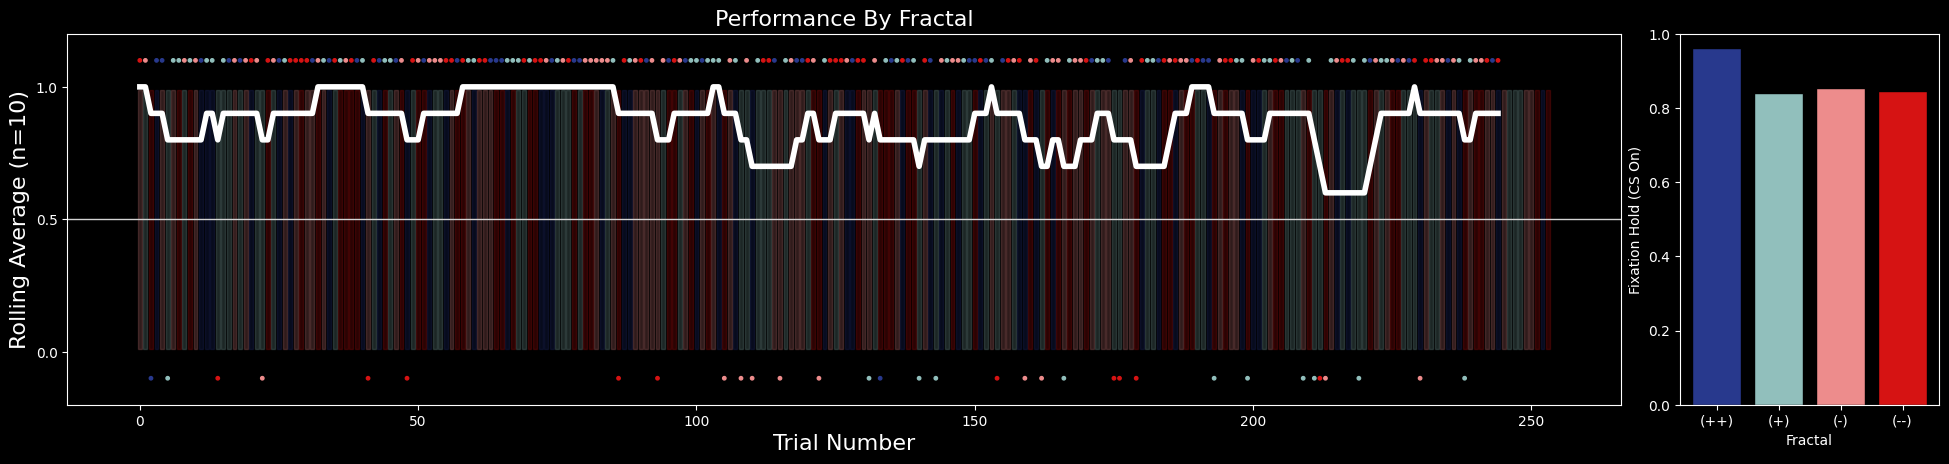

  session_latency.png saved.


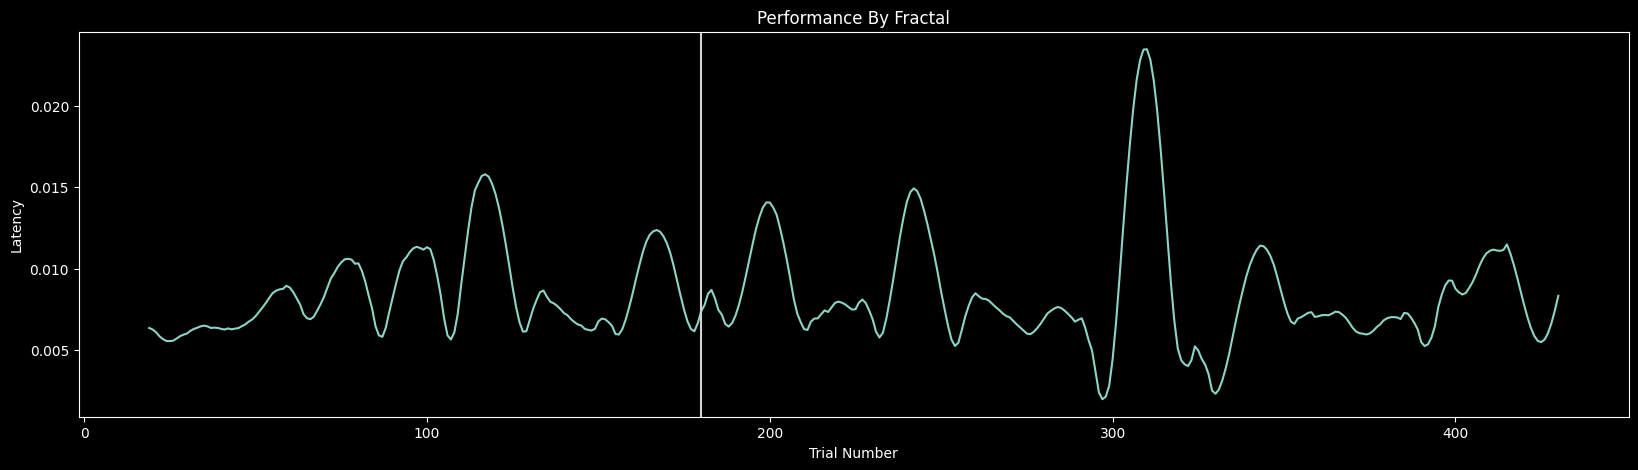

  epoch_hist.png saved.


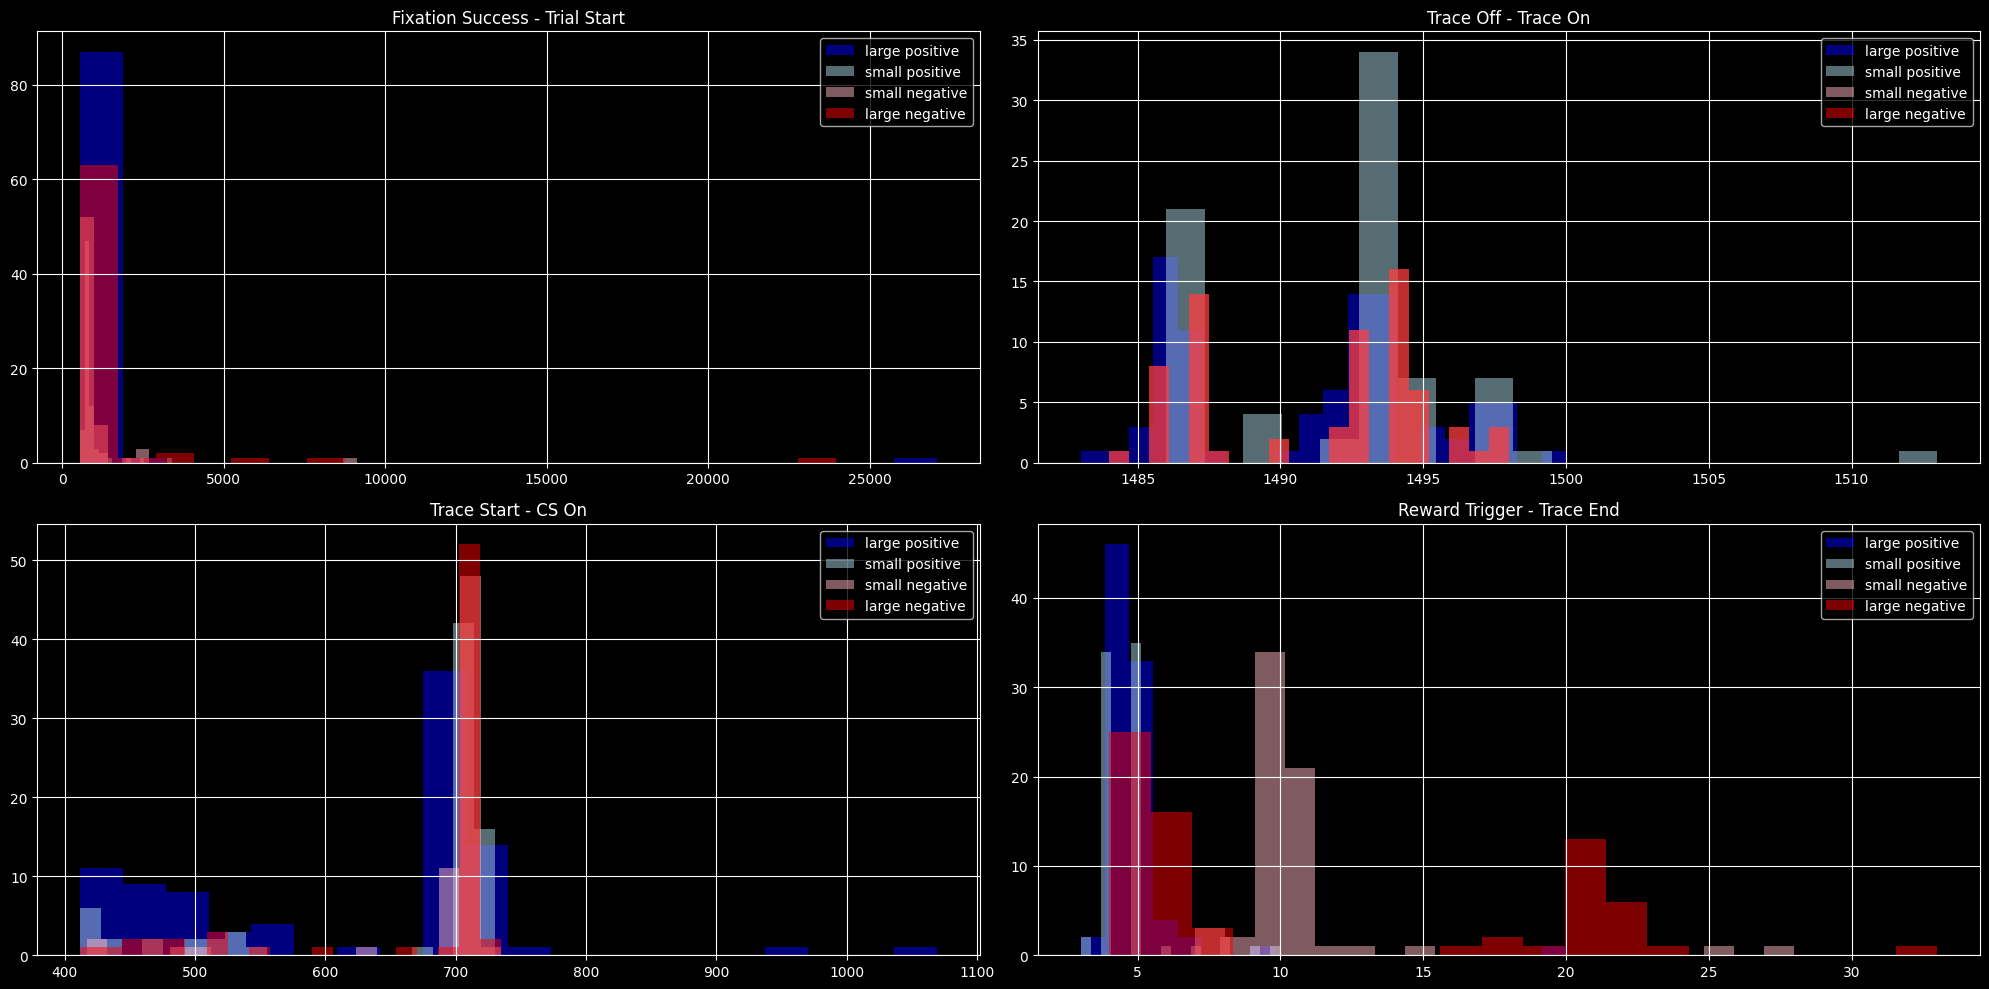

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: -0.236 | Blink Correlation: -0.204
  Valence 0.5: Lick Correlation: -0.369 | Blink Correlation: -0.107
  Valence -0.5: Lick Correlation: -0.263 | Blink Correlation: 0.09
  Valence -1.0: Lick Correlation: 0.094 | Blink Correlation: 0.443
Block: 2
  Valence 1.0: Lick Correlation: -0.181 | Blink Correlation: 0.286
  Valence 0.5: Lick Correlation: 0.212 | Blink Correlation: -0.406
  Valence -0.5: Lick Correlation: 0.159 | Blink Correlation: -0.305
  Valence -1.0: Lick Correlation: -0.123 | Blink Correlation: 0.01


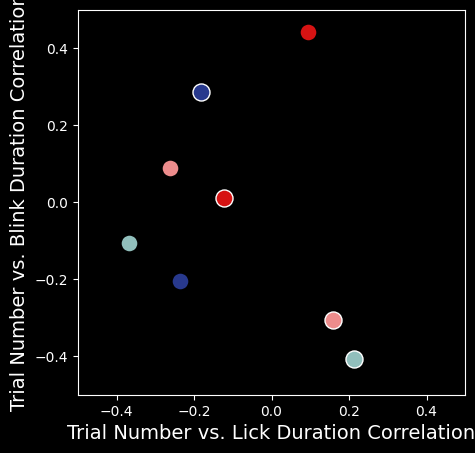

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


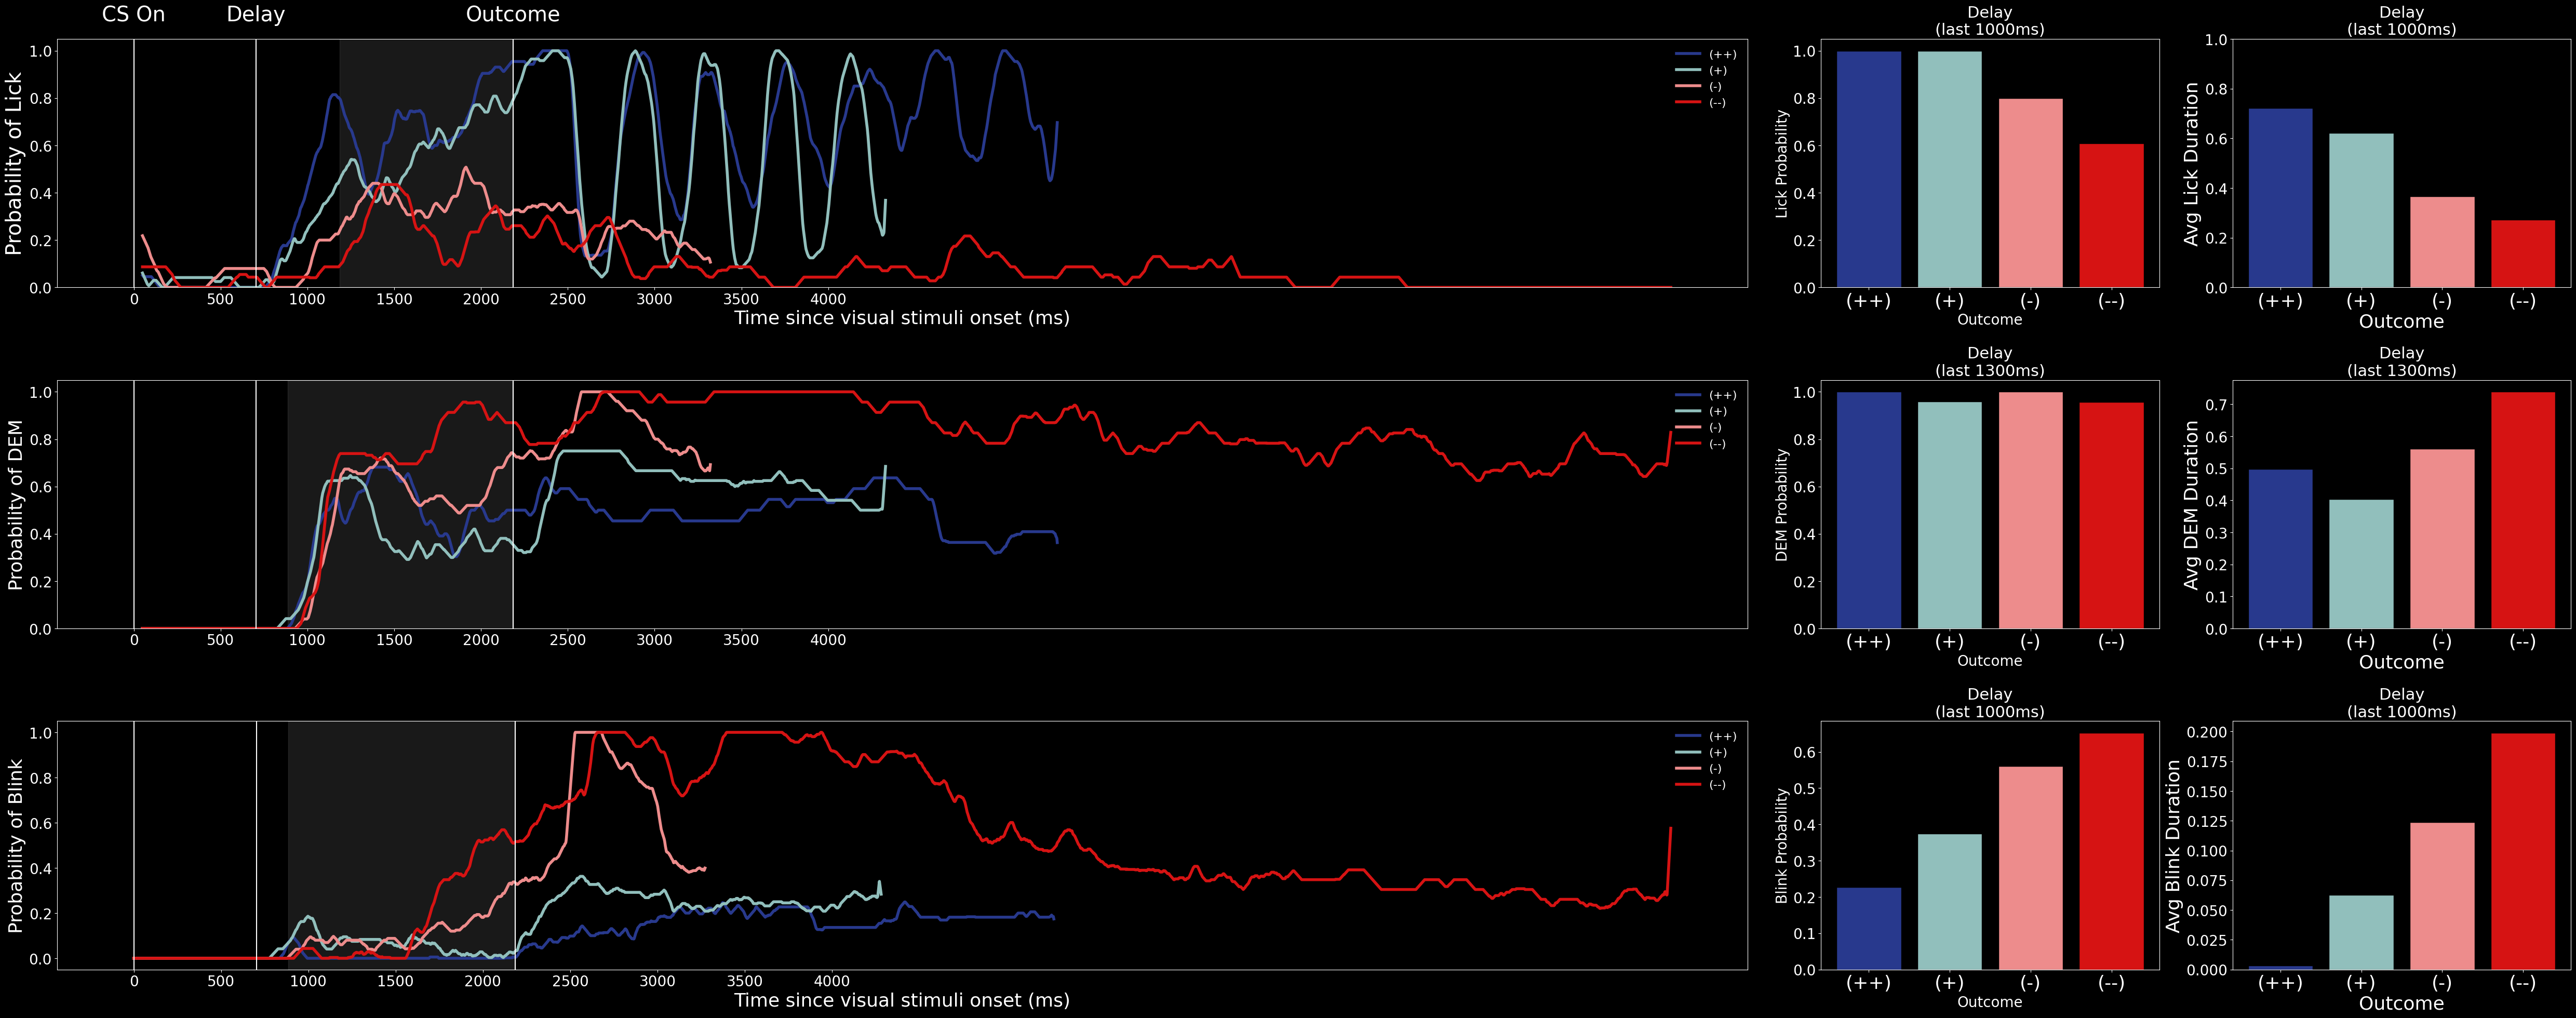

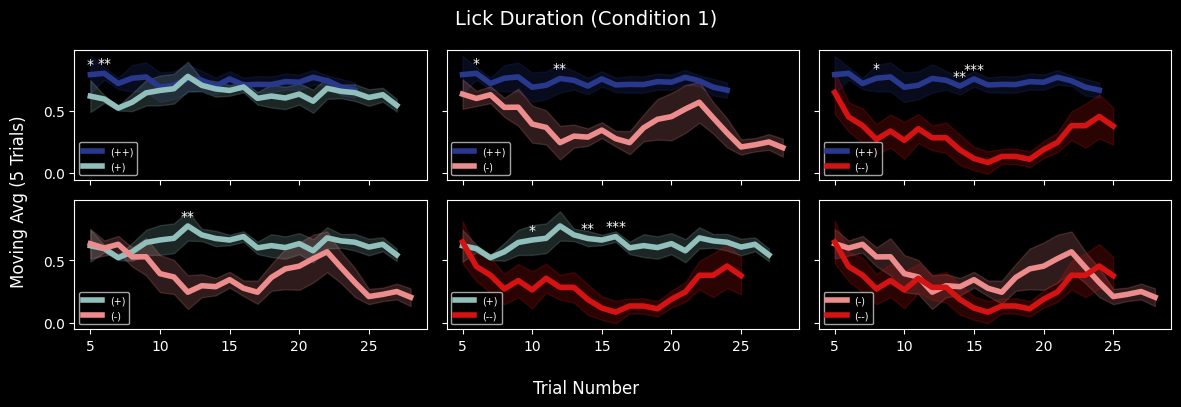

  t_test_DEM-duration_1.png saved.


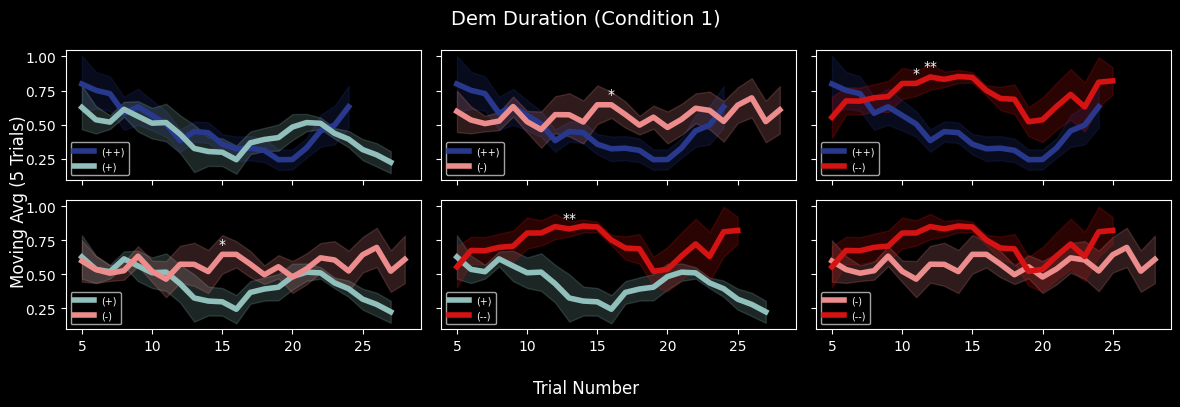

  t_test_blink-duration_1.png saved.


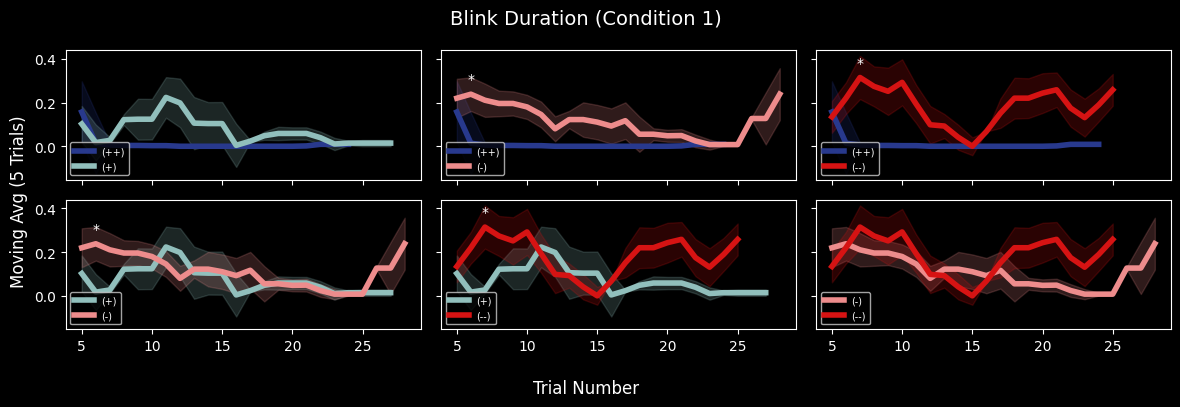

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


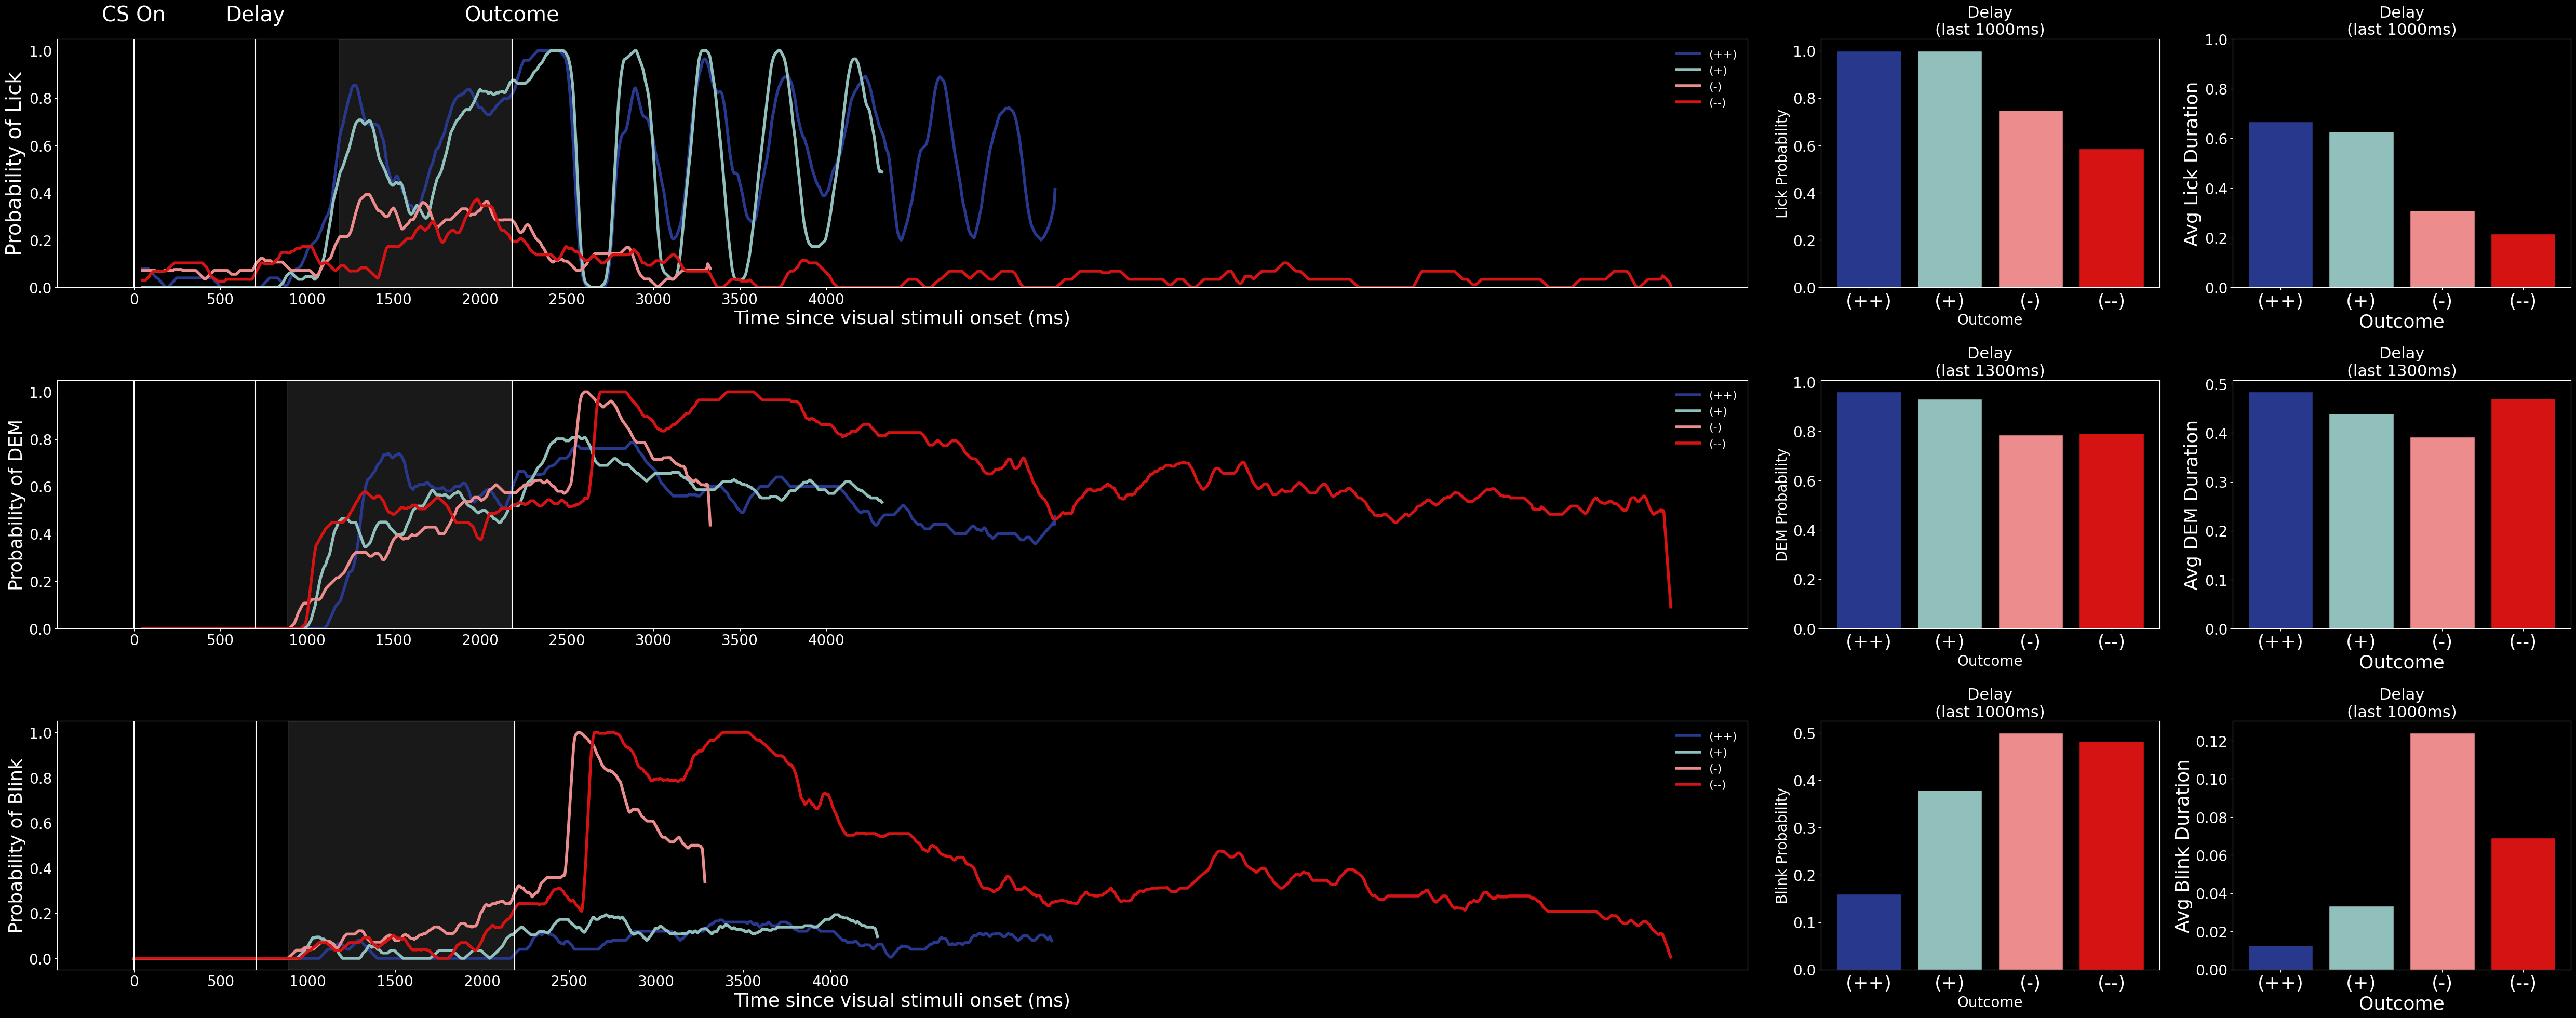

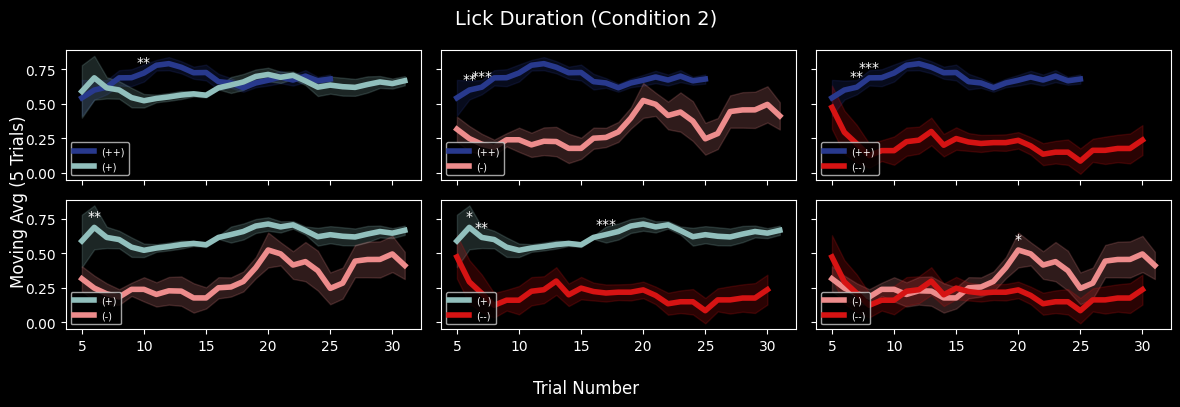

  t_test_DEM-duration_2.png saved.


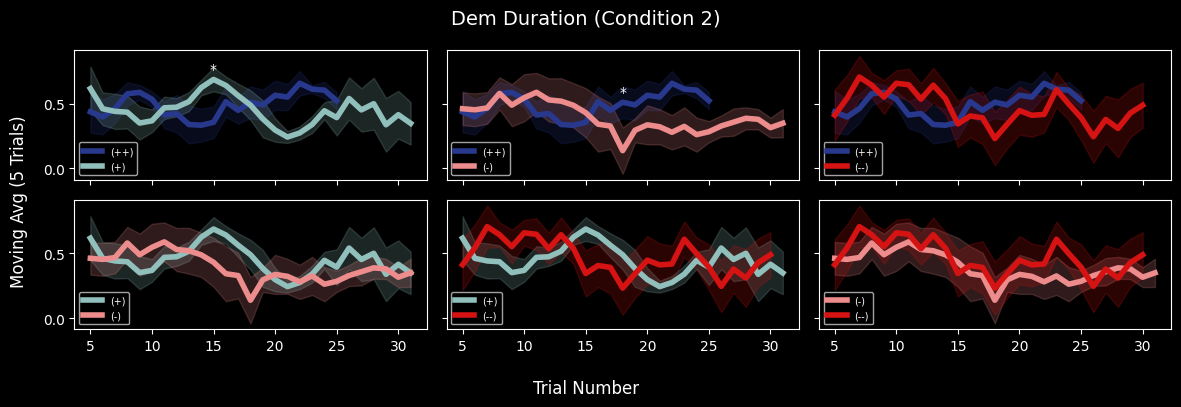

  t_test_blink-duration_2.png saved.


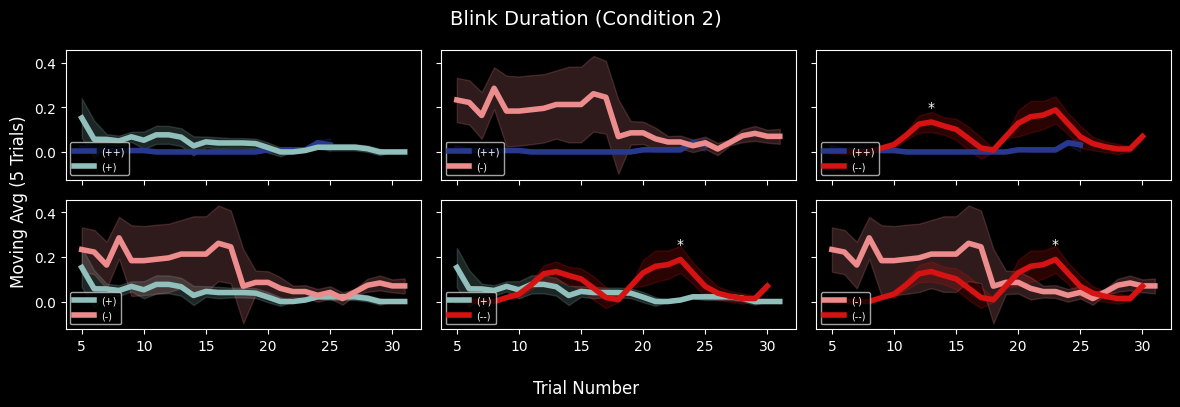

  raster_by_cond_1.svg saved.
 [0.0, 0.5, 1.0] ANOVA 49.791 | P-value: 1.32E-15
  (0, 1) T-value: -7.71 P-value: 8.86E-11 |  Z-value: -6.793 P-value: 1.10E-11
    0 Lick Mean: 0.278 Lick Std: 0.252 Trials: 43
    1 Lick Mean: 0.633 Lick Std: 0.127 Trials: 28
  (0, 2) T-value: -9.305 P-value: 2.53E-13 |  Z-value: -8.117 P-value: 4.78E-16
    0 Lick Mean: 0.278 Lick Std: 0.252 Trials: 43
    2 Lick Mean: 0.687 Lick Std: 0.108 Trials: 29
  (1, 2) T-value: -1.69 P-value: 9.70E-02 |  Z-value: -1.695 P-value: 9.01E-02
    1 Lick Mean: 0.633 Lick Std: 0.127 Trials: 28
    2 Lick Mean: 0.687 Lick Std: 0.108 Trials: 29
  grant_lick.png saved.
 [0.0, 0.5, 1.0] ANOVA 1.131 | P-value: 3.27E-01
  (0, 1) T-value: -0.616 P-value: 5.43E-01 |  Z-value: -0.689 P-value: 4.91E-01
    0 DEM Mean: 0.424 DEM Std: 0.238 Trials: 57
    1 DEM Mean: 0.469 DEM Std: 0.299 Trials: 21
  (0, 2) T-value: -1.245 P-value: 2.23E-01 |  Z-value: -1.512 P-value: 1.30E-01
    0 DEM Mean: 0.424 DEM Std: 0.238 Trials: 57
    2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (--) vs (-): ks_stat: 0.3, p_val: 7.38E-04
  (--) vs (+): ks_stat: 0.71, p_val: 7.89E-19
  (--) vs (++): ks_stat: 0.77, p_val: 4.82E-23
  (-) vs (+): ks_stat: 0.59, p_val: 6.87E-12
  (-) vs (++): ks_stat: 0.68, p_val: 1.34E-16
  (+) vs (++): ks_stat: 0.14, p_val: 4.31E-01
Blink
  (--) vs (-): ks_stat: 0.15, p_val: 2.49E-01
  (--) vs (+): ks_stat: 0.35, p_val: 1.27E-04
  (--) vs (++): ks_stat: 0.38, p_val: 1.67E-05
  (-) vs (+): ks_stat: 0.24, p_val: 2.38E-02
  (-) vs (++): ks_stat: 0.25, p_val: 1.67E-02
  (+) vs (++): ks_stat: 0.08, p_val: 9.73E-01
Total Eye Positions: 103500
Histogram Positions: 101638
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0027 0.0002 0.0008 0.     0.     0.     0.    ]
 [0.     0.     0.0074 0.0239 0.0004 0.0022 0.     0.    ]
 [0.0002 0.0009 0.0285 0.0543 0.1531 0.1374 0.0174 0.    ]
 [0.     0.0016 0.0191 0.1767

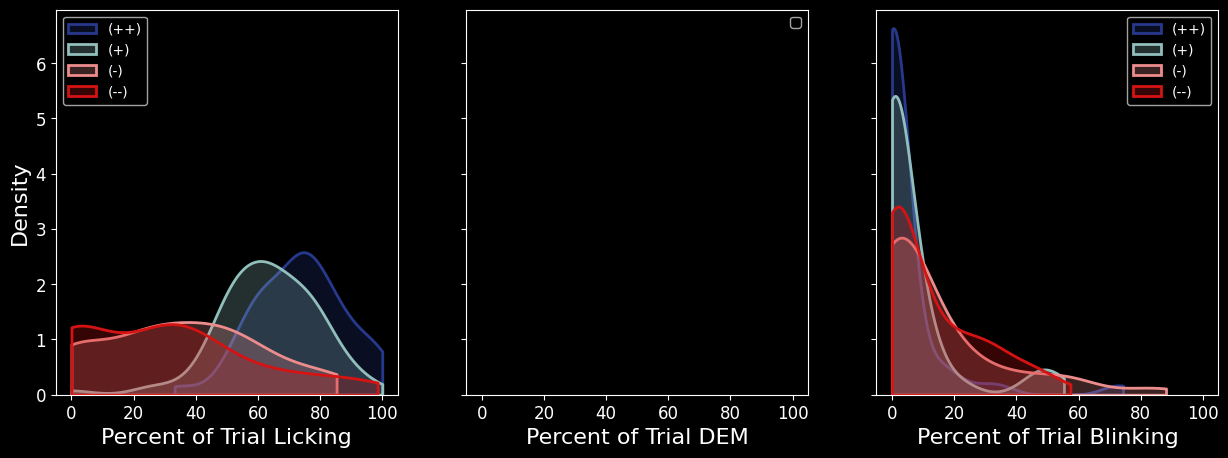

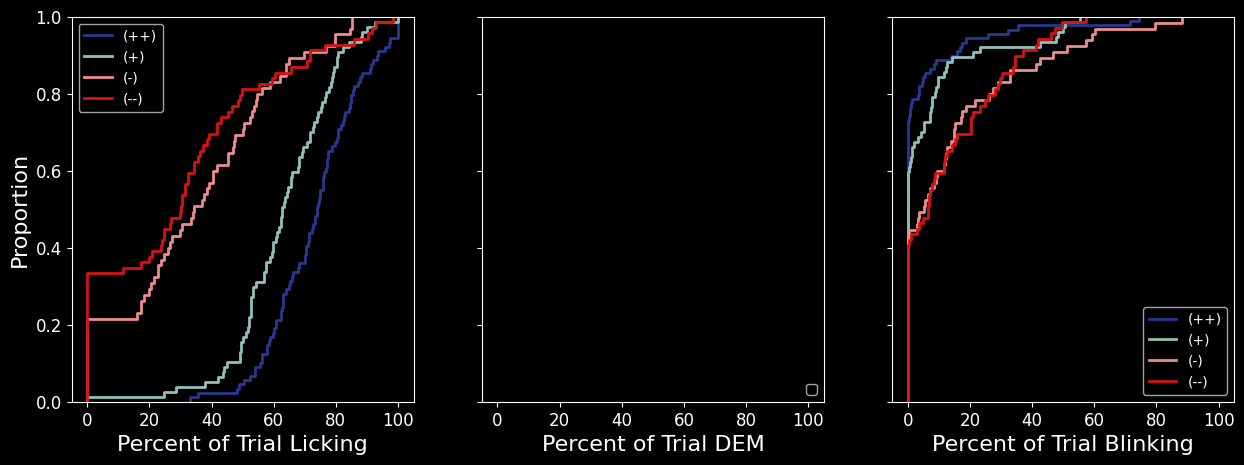

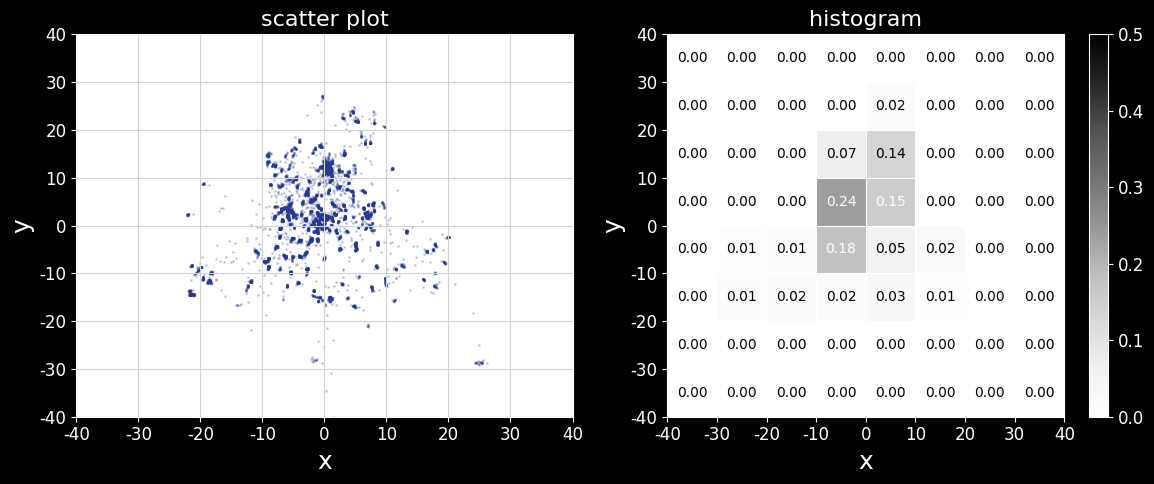

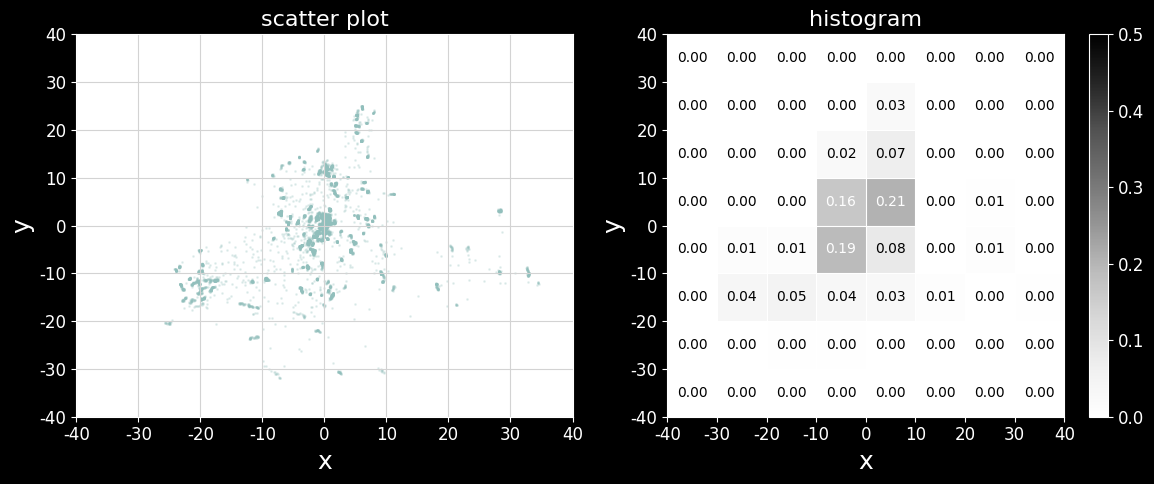

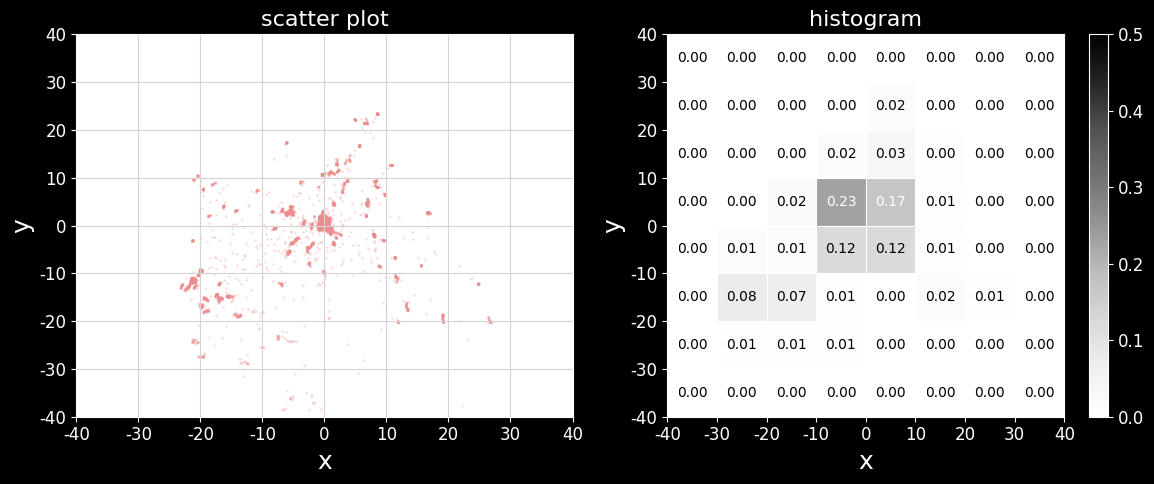

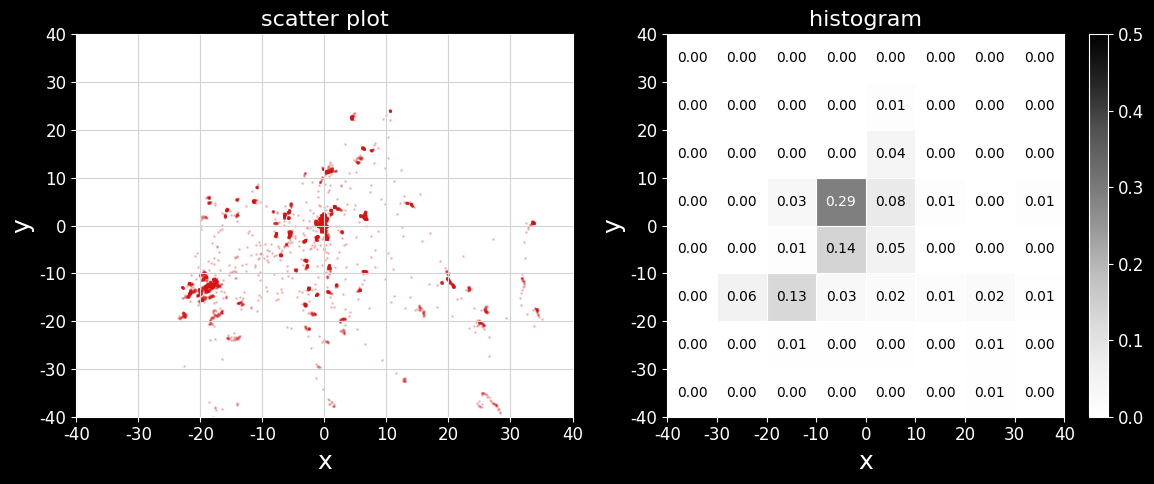

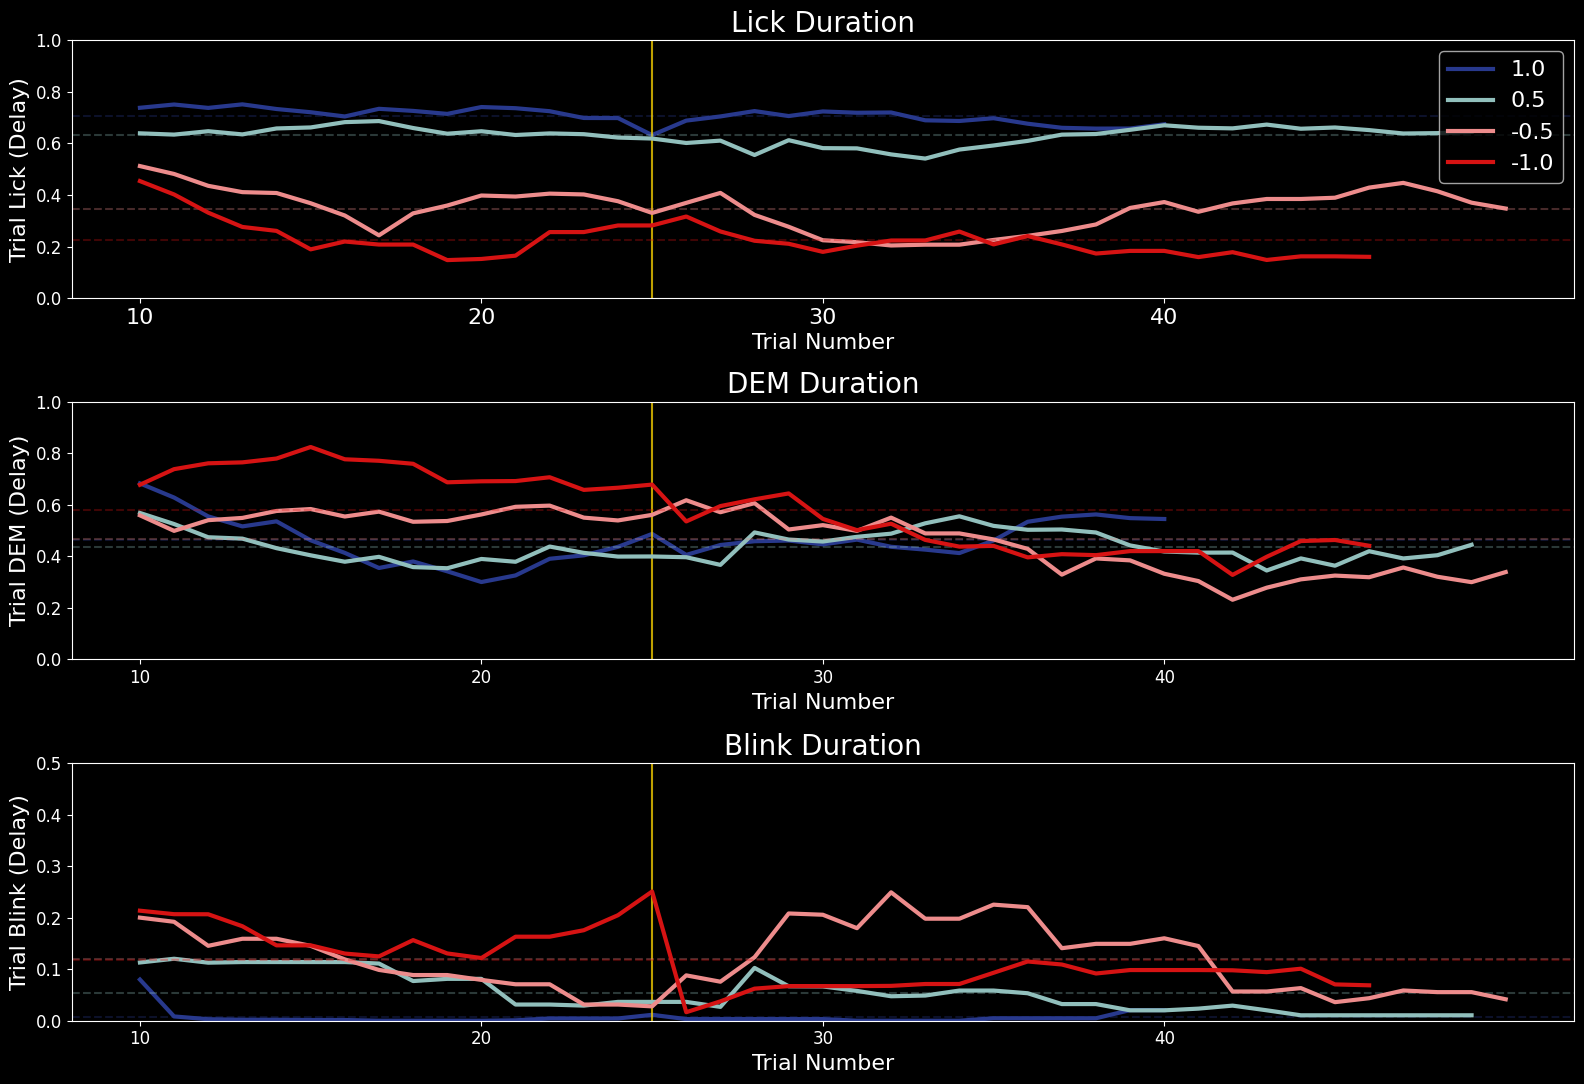

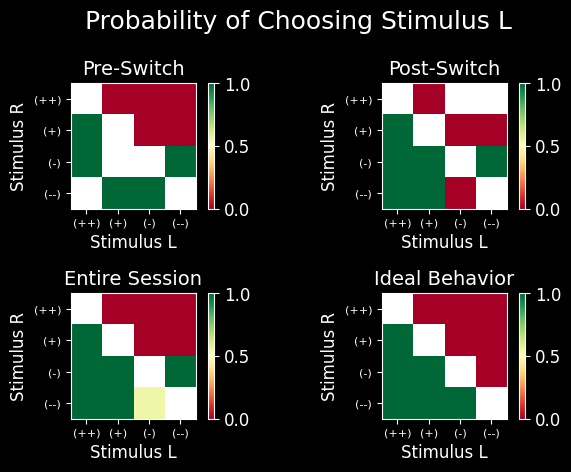

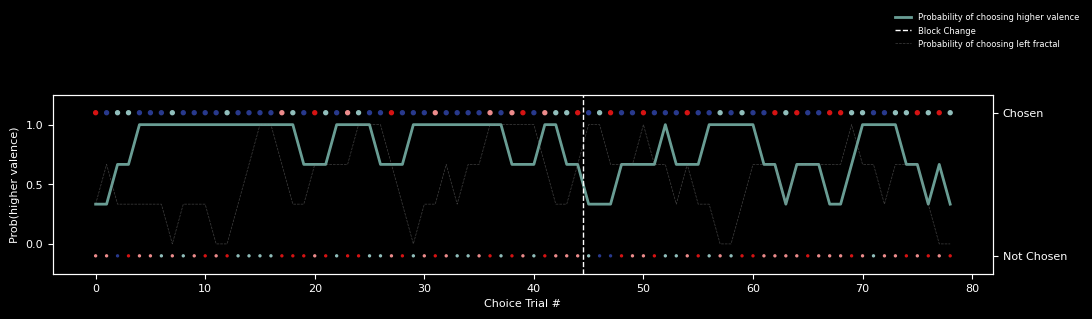

Reward vs. Airpuff Accuracy: 0.73 (+/- 0.19)
  lick_duration: 1.698
  blink_duration_offscreen: 0.032
  pupil_raster_window_avg: -0.471
  blink_duration_window: -0.594
  eye_distance: -0.004


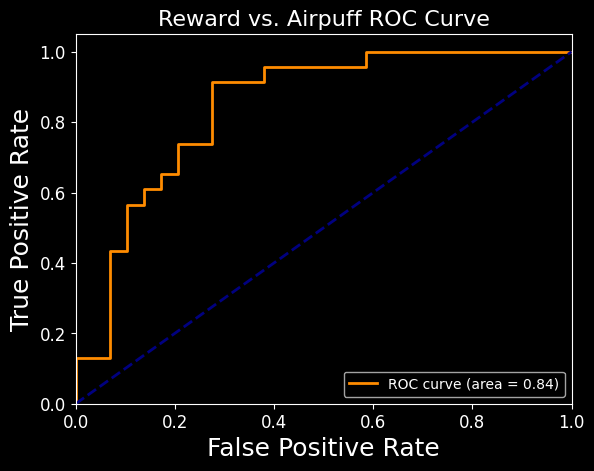

Large Reward vs. Small Reward Accuracy: 0.76 (+/- 0.16)
  lick_duration: 0.233
  blink_duration_offscreen: 0.586
  pupil_raster_window_avg: -0.076
  blink_duration_window: -0.118
  eye_distance: -0.023


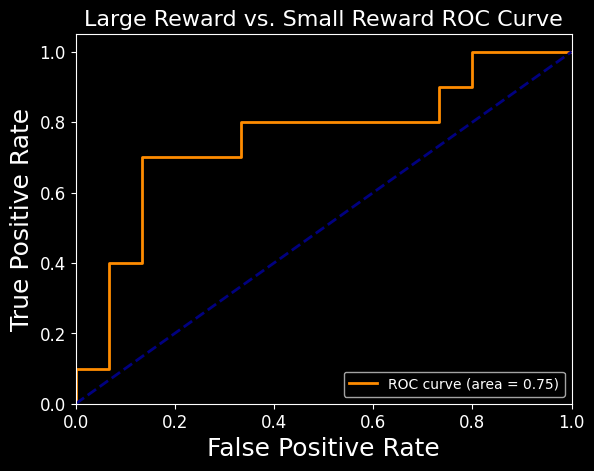

Large Airpuff vs. Small Airpuff Accuracy: 0.55 (+/- 0.40)
  lick_duration: -0.597
  blink_duration_offscreen: 0.562
  pupil_raster_window_avg: 0.094
  blink_duration_window: 0.113
  eye_distance: -0.003


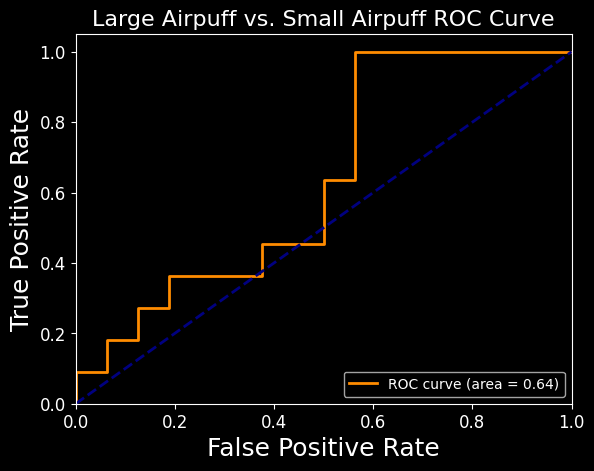


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20240517_aragorn.md
Writing to excel...
  Writing 240517 to Emotion_Tracker.xlsx


In [6]:
from analyses.run_functions import run_functions

dates = session_df['date'].unique()
for date in dates:
	print(date)
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
															behavioral_code_dict, error_dict)

# new dataframe not including valence = 0 or 0.25
# session_df_pos_neg = session_df.loc[session_df['valence'].isin([-1, -0.5, 0.5, 1]) &
# 																		session_df['valence_1'].isin([-1, -0.5, 0.5, 1])]
# session_obj = run_functions(session_df_pos_neg, session_obj, path_obj, behavioral_code_dict, error_dict)

In [49]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel')].head(10)

KeyError: 'fractal_chosen_novel'

### Look at lick rate by block for novel fractals

Analyzing Lick Difference Between Blocks
  Block 1: ~3.61 drops/trial
    Valence -1.0: ~0.0  drops/trial (n=25)
    Valence -0.5: ~0.0  drops/trial (n=28)
    Valence 0.5 : ~5.0  drops/trial (n=27)
    Valence 1.0 : ~10.0 drops/trial (n=24)
  Block 2: ~3.46 drops/trial
    Valence -1.0: ~0.0  drops/trial (n=30)
    Valence -0.5: ~0.0  drops/trial (n=31)
    Valence 0.5 : ~5.0  drops/trial (n=31)
    Valence 1.0 : ~10.0 drops/trial (n=25)


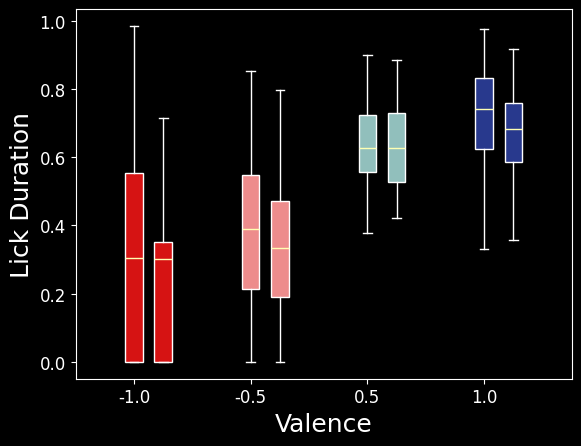

In [7]:
# see the average number of rewarded reinforcement trials in block 1 vs block 2
print(f'Analyzing Lick Difference Between Blocks')
f, ax = plt.subplots(1,1, sharey=True)
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
for block in session_df_reinforcement['block'].unique():
	session_df_block = session_df_reinforcement[session_df_reinforcement['block'] == block]
	# skip if <10 trials in the block
	if len(session_df_block) < 10:
		continue
	avg_reward_drops_block = session_df_block['reward_drops_1'].mean()
	print(f'  Block {block}: ~{round(avg_reward_drops_block, 2)} drops/trial')
	unique_valences = sorted(session_df_reinforcement['valence'].unique())
	for vix, valence in enumerate(unique_valences):
		avg_reward_drops_block_valence = session_df_block[session_df_block['valence'] == valence]['reward_drops_1']
		avg_reward_drops_block_valence_mean = avg_reward_drops_block_valence.mean()
		print(f'    Valence {valence:<4}: ~{round(avg_reward_drops_block_valence_mean, 2):<4} drops/trial (n={len(avg_reward_drops_block_valence)})')
		session_df_block_fractal = session_df_block[session_df_block['valence'] == valence]
		lick_rate_fractal = session_df_block_fractal['lick_duration'].tolist()
		# double box plot of lick rate without outliers where each block value is next to each other
		color = session_obj.valence_colors[valence]
		# set color to color
		pos_shift = [0 if block == 1 else 0.25][0]
		ax.boxplot(lick_rate_fractal, positions=[vix + pos_shift], patch_artist=True, boxprops=dict(facecolor=color), showfliers=False)
	# set x tick labels for the middle of the double box plot
	ax.set_xticks(range(len(unique_valences)))
	ax.set_xticklabels(unique_valences)
	ax.set_xlabel('Valence')
	ax.set_ylabel('Lick Duration')

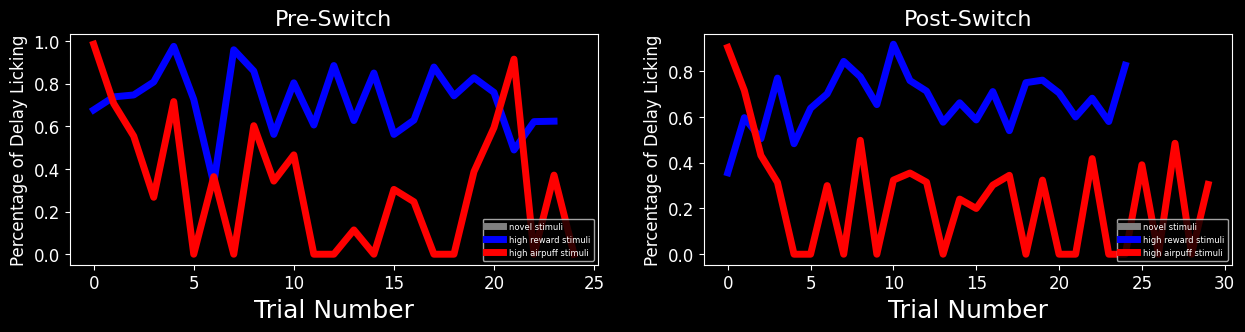

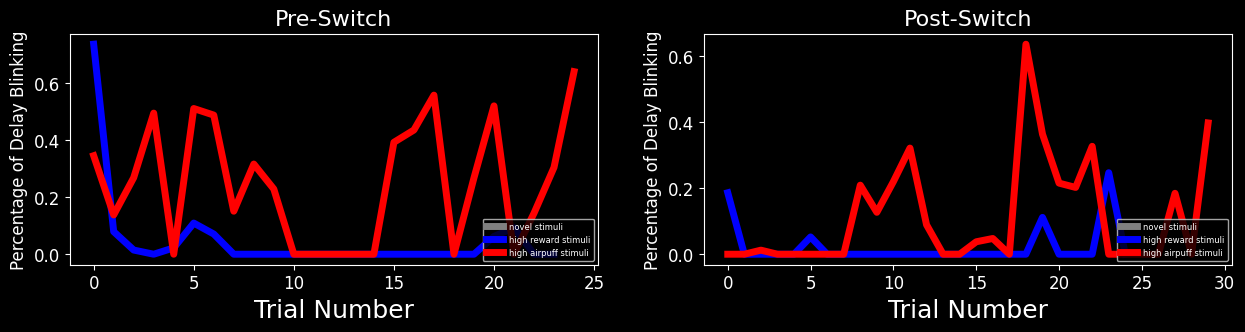

In [8]:
def novel_fractal_summary(session_df):
	session_df_correct = session_df[session_df['correct'] == 1]
	session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
	
	f, axarr = plt.subplots(1, 2, figsize=(15, 3))
	for i in [1,2]:
		session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
		session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
		session_novel = session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel') & (session_df_reinforcement['block'] == i)]
		session_high_reward_lick = session_high_reward['lick_duration']
		session_high_airpuff_lick = session_high_airpuff['lick_duration']
		session_novel_lick = session_novel['lick_duration']
		axarr[i-1].plot(range(len(session_novel_lick)), session_novel_lick, label='novel stimuli', color='grey', lw=5)
		axarr[i-1].plot(range(len(session_high_reward_lick)), session_high_reward_lick, label='high reward stimuli', color='blue', lw=5)
		axarr[i-1].plot(range(len(session_high_airpuff_lick)), session_high_airpuff_lick, label='high airpuff stimuli', color='red', lw=5)
		session_neutral = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) &
																									 (session_df_reinforcement['fractal_chosen_novel'] != '_fractal_novel') & 
																									 (session_df_reinforcement['block'] == i)]
		if len(session_neutral) > 0:
			session_neutral_lick = session_neutral['lick_duration']
			axarr[i-1].plot(range(len(session_neutral_lick)), session_neutral_lick, label='neutral stimuli', color='yellow', lw=5)
		# # select row with index block_change
		axarr[i-1].set_xlabel('Trial Number')
		axarr[i-1].set_ylabel('Percentage of Delay Licking', fontsize=12)
		if i == 1:
			axarr[i-1].set_title('Pre-Switch')
		else:
			axarr[i-1].set_title('Post-Switch')
		axarr[i-1].legend(loc='lower right', fontsize=6)
	plt.show()

	f, axarr = plt.subplots(1, 2, figsize=(15, 3))
	for i in [1,2]:
		session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
		session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
		session_novel = session_df_reinforcement.loc[(session_df_reinforcement['fractal_chosen_novel'] == '_fractal_novel') & (session_df_reinforcement['block'] == i)]
		session_novel_blink = session_novel['blink_duration_window']
		session_high_reward_blink = session_high_reward['blink_duration_window']
		session_high_airpuff_blink = session_high_airpuff['blink_duration_window']
		axarr[i-1].plot(range(len(session_novel_blink)), session_novel_blink, label='novel stimuli', color='grey', lw=5)
		axarr[i-1].plot(range(len(session_high_reward_blink)), session_high_reward_blink, label='high reward stimuli', color='blue', lw=5)
		axarr[i-1].plot(range(len(session_high_airpuff_blink)), session_high_airpuff_blink, label='high airpuff stimuli', color='red', lw=5)
		session_neutral = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) &
																									 (session_df_reinforcement['fractal_chosen_novel'] != '_fractal_novel') & 
																									 (session_df_reinforcement['block'] == i)]
		if len(session_neutral) > 0:
			session_neutral_blink = session_neutral['blink_duration_window']
			axarr[i-1].plot(range(len(session_neutral_blink)), session_neutral_blink, label='neutral stimuli', color='yellow', lw=5)
		# # select row with index block_change
		axarr[i-1].set_xlabel('Trial Number')
		axarr[i-1].set_ylabel('Percentage of Delay Blinking', fontsize=12)
		axarr[i-1].legend(loc='lower right', fontsize=6)
		if i == 1:
			axarr[i-1].set_title('Pre-Switch')
		else:
			axarr[i-1].set_title('Post-Switch')
	plt.show()

novel_fractal_summary(session_df_correct)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [9]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.87 (221/254)
   Valence 1.0: 0.961 (49/51)
   Valence 0.5: 0.841 (58/69)
   Valence -0.5: 0.855 (59/69)
   Valence -1.0: 0.846 (55/65)
 Percent successful choice trials: 0.94 (79/84)
   Valence Pair [-0.5, 1.0]: 1.0 (12/12)
   Valence Pair [-0.5, 0.5]: 1.0 (7/7)
   Valence Pair [-1.0, 1.0]: 1.0 (9/9)
   Valence Pair [-1.0, -0.5]: 0.95 (19/20)
   Valence Pair [-1.0, 0.5]: 0.909 (10/11)
   Valence Pair [0.5, 1.0]: 0.88 (22/25)
 Percent left choice trials: 0.557 (44/79)
 Percent higher valence choice trials: 0.797 (63/79)
   Valence Pair [-0.5, 1.0]: 1.0 (12/12)
   Valence Pair [-1.0, 0.5]: 1.0 (10/10)
   Valence Pair [-0.5, 0.5]: 1.0 (7/7)
   Valence Pair [0.5, 1.0]: 0.909 (20/22)
   Valence Pair [-1.0, 1.0]: 0.889 (8/9)
   Valence Pair [-1.0, -0.5]: 0.316 (6/19)


Reaction Time on Choice Trials
 Valence: -1.0
   Reaction Time: 170.857
   Valence Not Chosen: -0.5 172.077 (13)
   Valence Not Chosen: 1.0 155.0 (1)
 Valence: -0

In [13]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
							[['lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg  \
valence                                                                     
-1.0          0.274636                  0.572937                 0.120783   
-0.5          0.353966                  0.486558                 0.138149   
 0.5          0.620569                  0.450703                 0.059788   
 1.0          0.693531                  0.509152                 0.023736   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.174420     68.278283  
-0.5                  0.186949     89.995964  
 0.5                  0.099907     79.556206  
 1.0                  0.036421     62.049865

In [16]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen_novel'])\
							[['valence', 'fractal_count_in_block', 'lick_duration',
								'blink_duration_offscreen',
								'pupil_raster_window_avg',
								'blink_duration_window',
								'eye_distance']].mean()

valence  fractal_count_in_block  \
condition fractal_chosen_novel                                    
1         _fractal_A                1.0               25.541667   
          _fractal_B                0.5               18.555556   
          _fractal_C               -0.5               15.857143   
          _fractal_D               -1.0               14.800000   
2         _fractal_A               -0.5               16.000000   
          _fractal_B               -1.0               20.000000   
          _fractal_C                1.0               22.280000   
          _fractal_D                0.5               19.838710   

                                lick_duration  blink_duration_offscreen  \
condition fractal_chosen_novel                                            
1         _fractal_A                 0.720375                  0.535417   
          _fractal_B                 0.625630                  0.434274   
          _fractal_C                 0.390000                  0.572720   
          _fractal_D                 0.317440                  0.711662   
2         _fractal_A                 0.321419                  0.408734   
          _fractal_B                 0.238967                  0.457333   
          _fractal_C                 0.667760                  0.483938   
          _fractal_D                 0.616161                  0.465012   

                                pupil_raster_window_avg  \
condition fractal_chosen_novel                            
1         _fractal_A                           0.035096   
          _fractal_B                           0.074615   
          _fractal_C                           0.143709   
          _fractal_D                           0.185662   
2         _fractal_A                           0.133127   
          _fractal_B                           0.066718   
          _fractal_C                           0.012831   
          _fractal_D                           0.046873   

                                blink_duration_window  eye_distance  
condition fractal_chosen_novel                                       
1         _fractal_A                         0.049487     64.405964  
          _fractal_B                         0.124615     83.279740  
          _fractal_C                         0.201951     94.607849  
          _fractal_D                         0.248062     68.875255  
2         _fractal_A                         0.173400     85.830390  
          _fractal_B                         0.113051     67.780806  
          _fractal_C                         0.023877     59.788010  
          _fractal_D                         0.078387     76.313127

In [14]:
pd.set_option('display.max_rows', None)
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
correct_choice_trials = [1 if session_df_choice['valence'].iloc[i] == np.max([session_df_choice['valence_1'].iloc[i], session_df_choice['valence_2'].iloc[i]], axis=0) else 0 for i in range(len(session_df_choice))]
session_df_choice['correct_choice'] = correct_choice_trials
session_df_choice[['block', 'valence_1', 'valence_2', 'valence', 'correct_choice']]

block  valence_1  valence_2  valence  correct_choice
1        1       -1.0       -0.5     -1.0               0
2        1       -0.5        1.0      1.0               1
11       1        0.5        1.0      0.5               0
22       1       -1.0        0.5      0.5               1
26       1       -0.5        1.0      1.0               1
28       1        1.0       -0.5      1.0               1
31       1        0.5        1.0      1.0               1
35       1       -0.5        0.5      0.5               1
39       1        0.5        1.0      1.0               1
41       1        1.0       -0.5      1.0               1
44       1       -1.0        1.0      1.0               1
47       1       -0.5        1.0      1.0               1
57       1       -1.0        0.5      0.5               1
59       1        0.5        1.0      1.0               1
61       1        1.0        0.5      1.0               1
62       1        1.0        0.5      1.0               1
70       1        1.0        0.5      1.0               1
74       1       -0.5       -1.0     -0.5               1
80       1       -1.0        0.5      0.5               1
84       1       -1.0        1.0      1.0               1
85       1       -1.0       -0.5     -1.0               0
87       1        0.5       -1.0      0.5               1
92       1        0.5        1.0      1.0               1
103      1       -0.5       -1.0     -0.5               1
106      1        0.5       -1.0      0.5               1
108      1        1.0        0.5      1.0               1
110      1        1.0        0.5      1.0               1
117      1       -1.0       -0.5     -1.0               0
118      1       -1.0        1.0      1.0               1
128      1        0.5        1.0      1.0               1
138      1       -0.5        1.0      1.0               1
140      1       -0.5       -1.0     -0.5               1
141      1       -0.5        1.0      1.0               1
143      1        1.0        0.5      1.0               1
145      1        0.5        1.0      1.0               1
154      1        1.0       -0.5      1.0               1
156      1       -0.5       -1.0     -0.5               1
159      1        1.0        0.5      1.0               1
167      1       -0.5       -1.0     -0.5               1
169      1       -1.0       -0.5     -1.0               0
171      1        1.0        0.5      1.0               1
173      1       -0.5       -1.0     -0.5               1
174      1       -0.5        0.5      0.5               1
176      1       -0.5        0.5      0.5               1
177      1       -1.0       -0.5     -1.0               0
178      1        1.0        0.5      1.0               1
181      2        0.5        1.0      0.5               0
182      2       -1.0        1.0     -1.0               0
184      2       -1.0        1.0      1.0               1
188      2        1.0       -0.5      1.0               1
201      2       -1.0       -0.5     -1.0               0
203      2        1.0       -1.0      1.0               1
212      2        0.5        1.0      1.0               1
229      2        1.0        0.5      1.0               1
233      2       -0.5       -1.0     -1.0               0
236      2        1.0       -1.0      1.0               1
247      2        0.5        1.0      1.0               1
252      2       -0.5        0.5      0.5               1
255      2        0.5        1.0      1.0               1
256      2       -1.0        0.5      0.5               1
259      2        1.0       -1.0      1.0               1
264      2        1.0       -0.5      1.0               1
275      2       -0.5       -1.0     -1.0               0
282      2        0.5       -0.5      0.5               1
284      2       -0.5       -1.0     -1.0               0
314      2        1.0       -1.0      1.0               1
316      2        1.0       -0.5      1.0               1
343      2       -0.5       -1.0     -1.0               0
353

### Behavioral Summary Panels by Valence

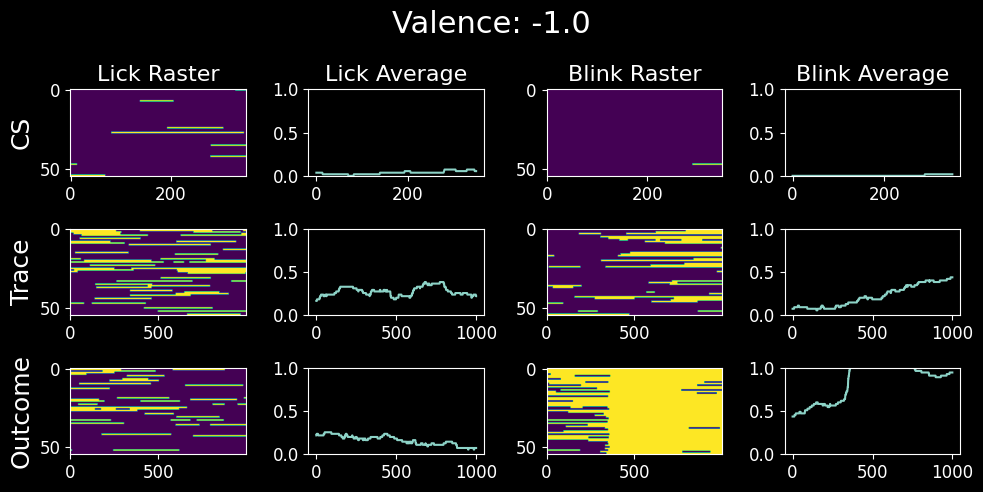

Valence: -1.0
  Lick CS: 0.036
  Lick Trace: 0.275
  Lick Outcome: 0.162


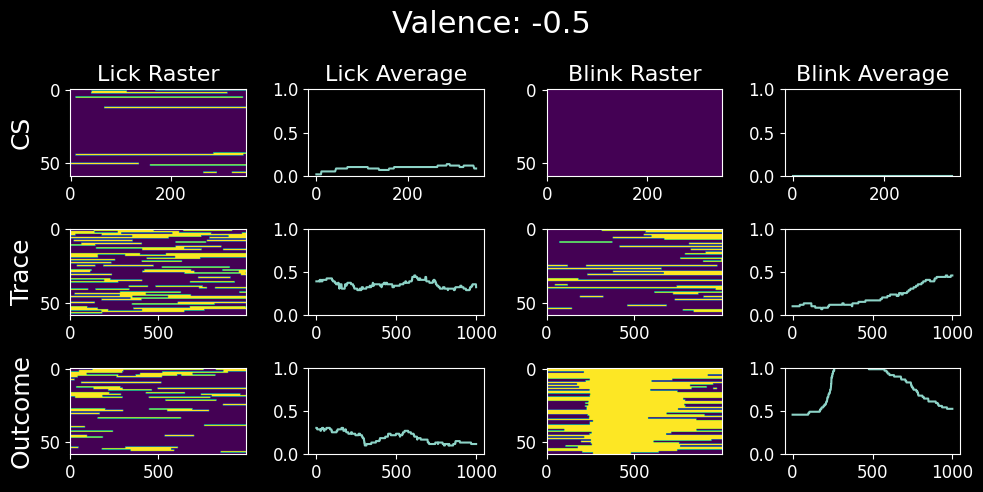

Valence: -0.5
  Lick CS: 0.093
  Lick Trace: 0.354
  Lick Outcome: 0.195


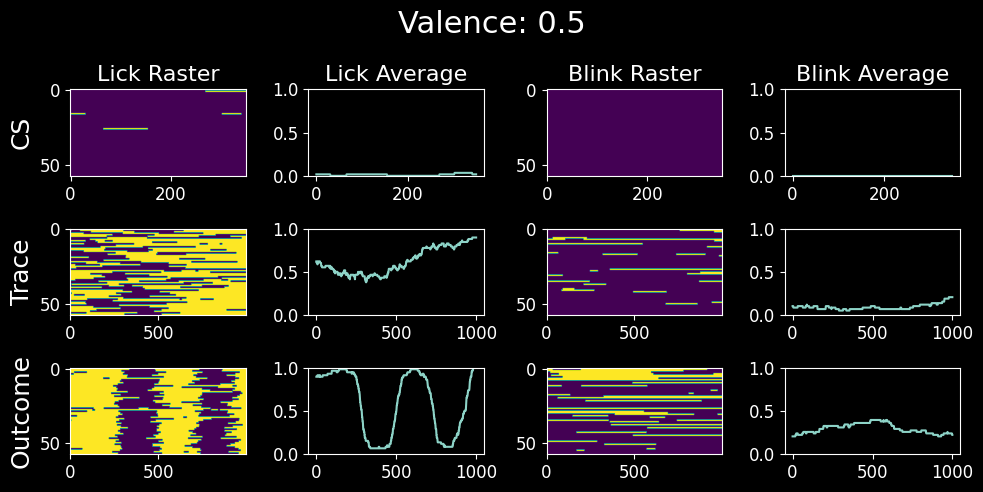

Valence: 0.5
  Lick CS: 0.012
  Lick Trace: 0.622
  Lick Outcome: 0.591


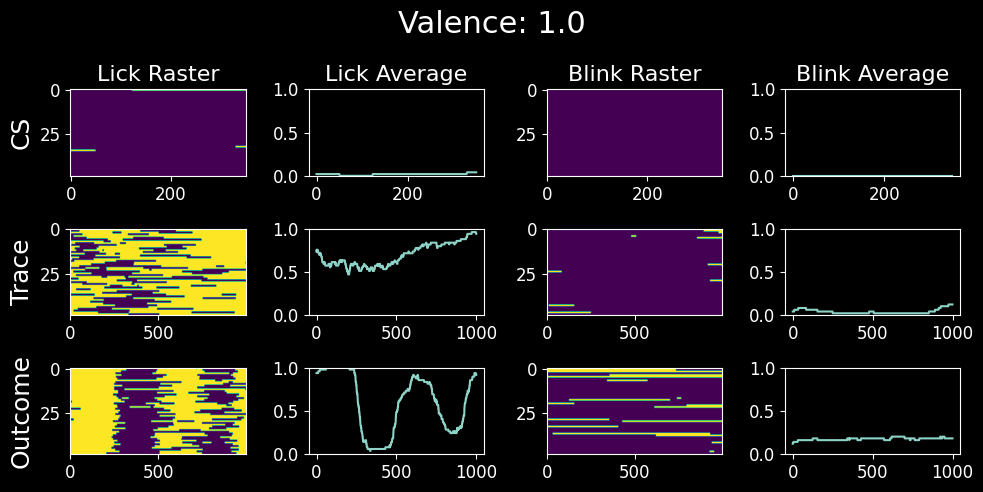

Valence: 1.0
  Lick CS: 0.017
  Lick Trace: 0.695
  Lick Outcome: 0.599


In [17]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

In [18]:
session_df_correct[['trial_num', 'block', 'valence', 'fractal_chosen', 
										'fractal_not_chosen', 'lick_duration', 'blink_duration_offscreen', 
										'eye_distance']]

trial_num  block  valence fractal_chosen fractal_not_chosen  \
0            1      1     -0.5     _fractal_C         _fractal_C   
1            2      1     -1.0     _fractal_D         _fractal_C   
2            3      1      1.0     _fractal_A         _fractal_C   
3            4      1      0.5     _fractal_B         _fractal_B   
4            5      1     -1.0     _fractal_D         _fractal_D   
5            6      1      1.0     _fractal_A         _fractal_A   
6            7      1     -0.5     _fractal_C         _fractal_C   
7            8      1      0.5     _fractal_B         _fractal_B   
8            9      1     -0.5     _fractal_C         _fractal_C   
9           10      1     -1.0     _fractal_D         _fractal_D   
10          11      1      0.5     _fractal_B         _fractal_B   
11          12      1      0.5     _fractal_B         _fractal_A   
12          13      1     -1.0     _fractal_D         _fractal_D   
13          14      1     -0.5     _fractal_C         _fractal_C   
15          16      1      1.0     _fractal_A         _fractal_A   
16          17      1      1.0     _fractal_A         _fractal_A   
18          19      1      0.5     _fractal_B         _fractal_B   
20          21      1      0.5     _fractal_B         _fractal_B   
22          23      1      0.5     _fractal_B         _fractal_D   
23          24      1     -0.5     _fractal_C         _fractal_C   
24          25      1      0.5     _fractal_B         _fractal_B   
26          27      1      1.0     _fractal_A         _fractal_C   
27          28      1     -0.5     _fractal_C         _fractal_C   
28          29      1      1.0     _fractal_A         _fractal_C   
31          32      1      1.0     _fractal_A         _fractal_B   
32          33      1      1.0     _fractal_A         _fractal_A   
33          34      1      0.5     _fractal_B         _fractal_B   
34          35      1      0.5     _fractal_B         _fractal_B   
35          36      1      0.5     _fractal_B         _fractal_C   
37          38      1      0.5     _fractal_B         _fractal_B   
38          39      1      1.0     _fractal_A         _fractal_A   
39          40      1      1.0     _fractal_A         _fractal_B   
41          42      1      1.0     _fractal_A         _fractal_C   
43          44      1     -0.5     _fractal_C         _fractal_C   
44          45      1      1.0     _fractal_A         _fractal_D   
45          46      1      1.0     _fractal_A         _fractal_A   
46          47      1     -0.5     _fractal_C         _fractal_C   
47          48      1      1.0     _fractal_A         _fractal_C   
49          50      1     -1.0     _fractal_D         _fractal_D   
50          51      1     -0.5     _fractal_C         _fractal_C   
52          53      1     -1.0     _fractal_D         _fractal_D   
53          54      1     -0.5     _fractal_C         _fractal_C   
54          55      1      1.0     _fractal_A         _fractal_A   
55          56      1      0.5     _fractal_B         _fractal_B   
56          57      1     -1.0     _fractal_D         _fractal_D   
57          58      1      0.5     _fractal_B         _fractal_D   
58          59      1     -1.0     _fractal_D         _fractal_D   
59          60      1      1.0     _fractal_A         _fractal_B   
60          61      1     -1.0     _fractal_D         _fractal_D   
61          62      1      1.0     _fractal_A         _fractal_B   
62          63      1      1.0     _fractal_A         _fractal_B   
65          66      1     -1.0     _fractal_D         _fractal_D   
66          67      1      1.0     _fractal_A         _fractal_A   
67          68      1     -0.5     _fractal_C         _fractal_C   
68          69      1      0.5     _fractal_B         _fractal_B   
69          70      1      1.0     _fractal_A         _fractal_A   
70          71      1      1.0     _fractal_A         _fractal_B   
72          73      1     -1.0     _fractal_D         _fracta

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [19]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 50) &
											 (session_df_correct['lick_duration'] > 0.8)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  block  valence fractal_chosen fractal_not_chosen  \
31   240517         32      1      1.0     _fractal_A         _fractal_B   
69   240517         70      1      1.0     _fractal_A         _fractal_A   
108  240517        109      1      1.0     _fractal_A         _fractal_B   
110  240517        111      1      1.0     _fractal_A         _fractal_B   
116  240517        117      1      1.0     _fractal_A         _fractal_A   
133  240517        134      1     -0.5     _fractal_C         _fractal_C   
136  240517        137      1      1.0     _fractal_A         _fractal_A   
138  240517        139      1      1.0     _fractal_A         _fractal_C   
159  240517        160      1      1.0     _fractal_A         _fractal_B   
236  240517        237      2      1.0     _fractal_C         _fractal_B   
261  240517        262      2      1.0     _fractal_C         _fractal_C   

     lick_duration  blink_duration_offscreen  eye_distance  
31           1.000                  0.884615     33.062599  
69           0.859                  0.500000     42.207522  
108          0.932                  0.133846     39.565075  
110          0.971                  0.350769     48.515712  
116          0.850                  0.127692     48.170032  
133          0.845                  0.890769     36.052274  
136          0.828                  0.133846     46.237758  
138          0.850                  0.189231     49.237487  
159          0.872                  0.069231     33.180117  
236          0.855                  0.216923     36.512959  
261          0.918                  0.000000     11.308793

### High DEM + Blink + Eye Movement / Low Lick Trials

In [5]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.9) &
											 (session_df_correct['eye_distance'] > 100) & 
											 (session_df_correct['lick_duration'] < 0.1)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  block  valence fractal_chosen fractal_not_chosen  \
29   240411         30      1     -1.0     _fractal_D         _fractal_D   
186  240411        187      1     -1.0     _fractal_D         _fractal_D   
191  240411        192      1     -1.0     _fractal_D         _fractal_C   
225  240411        226      1     -1.0     _fractal_D         _fractal_D   
451  240411        452      2     -0.5     _fractal_A         _fractal_A   
464  240411        465      2      1.0     _fractal_C         _fractal_C   

     lick_duration  blink_duration_offscreen  eye_distance  
29             0.0                  0.938462   1859.458543  
186            0.0                  0.911538    380.436954  
191            0.0                  0.912308   2538.965182  
225            0.0                  0.965385    974.195660  
451            0.0                  1.000000  11032.187322  
464            0.0                  0.933846    969.532184

In [21]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation -0.075
Lick vs. Blink Correlation -0.159
DEM vs. Blink Correlation 0.394
Pupil 0 vs. Blink Correlation 0.951


***
## Single Trial Analysis

In [6]:
trial_num_selected = 30
trial_df_selected = session_df[session_df['trial_num'] == trial_num_selected]
trial_df_selected[['correct',
										 'valence',
										 'fractal_chosen',
										 'fractal_not_chosen',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
										 'blink_duration_window',
										 'eye_distance',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence fractal_chosen fractal_not_chosen  lick_duration  \
29        1     -1.0     _fractal_D         _fractal_D            0.0   

    blink_duration_sig  blink_duration_offscreen  pupil_raster_window_avg  \
29                 0.0                  0.938462                 0.047692   

    blink_duration_window  eye_distance  eye_distance Outcome Start  \
29               0.118462   1859.458543   1859.458543          4619   

   Reward Trigger Airpuff Trigger  
29           <NA>            4638

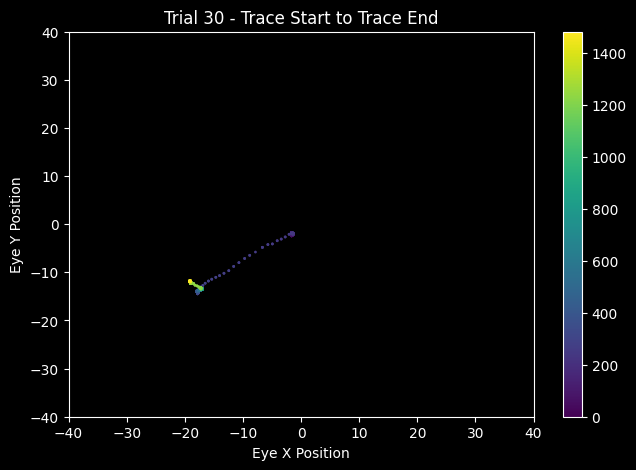

In [9]:
def plot_eye_single_trial(session_df, trial_num, epoch_start, epoch_end):
	# 3 figures, where the left one is twice as tall as the other two
	f, axarr = plt.subplots(1, 1, figsize=(7.5, 5))
	trial = session_df[session_df['trial_num'] == trial_num]
	epoch_start_time = trial[epoch_start].iloc[0]
	epoch_end_time = trial[epoch_end].iloc[0]
	trial_eye_x = trial['eye_x'].tolist()[0][epoch_start_time:epoch_end_time]
	trial_eye_y = trial['eye_y'].tolist()[0][epoch_start_time:epoch_end_time]
	# trial_eye_x = trial['eye_x'].iloc[0]
	# trial_eye_y = trial['eye_y'].iloc[0]
	# show heat map
	plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
	plt.colorbar()
	plt.xlim(-40, 40)
	plt.ylim(-40, 40)
	plt.title(f'Trial {trial_num} - {epoch_start} to {epoch_end}')
	plt.xlabel('Eye X Position')
	plt.ylabel('Eye Y Position')
	plt.show()

plot_eye_single_trial(session_df, trial_num_selected, 
											epoch_start='Trace Start', epoch_end='Trace End')

Total Eye Positions: 1500
Histogram Positions: 1398
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.0014 0.     0.     0.     0.     0.     0.     0.    ]
 [0.2217 0.2546 0.0043 0.     0.     0.     0.     0.    ]
 [0.     0.     0.01   0.     0.     0.     0.     0.    ]
 [0.     0.     0.2217 0.     0.     0.     0.     0.    ]
 [0.     0.     0.0086 0.01   0.1588 0.     0.     0.    ]
 [0.     0.     0.073  0.0057 0.     0.     0.     0.    ]
 [0.     0.     0.03   0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 83.12%
outside x,y [-40, 40]: 6.8%
  eye_heatmap_-1.0.png saved.


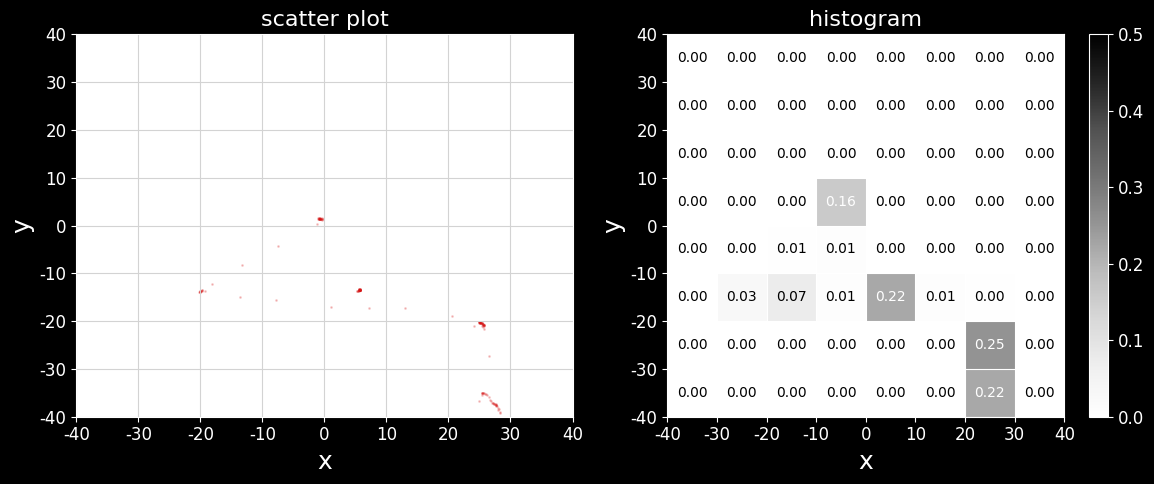

In [26]:
plt.style.use('dark_background')
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_num_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [14]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
	0: 'cam_sync',
	1: 'cam_save',
	2: 'lick',
	3: 'photodiode',
	4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
					'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

Created new session folder: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/Aragorn_231026


AttributeError: 'SessionPath' object has no attribute 'spikeglx_dir_path'

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [ ]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
					'session_obj': session_obj, 
					'trial_start': 0,
					'trial_end': len(session_obj.df),
					'epoch_start': 'Trace Start', 
					'epoch_end': 'Outcome Start', 
					'thread_flag': True}

parse_wm_videos(**kwargs)

***
## Generate MonkeyLogic Behavior Trial Videos

Found 40 marker files.
  Reading: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_230929/aragorn_230929_4_e3v83d6DLC_resnet50_230929_aragorn_face_2Oct23shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_230929/aragorn_230929_8_e3v831bDLC_resnet50_230929_aragorn_body_2Oct23shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_230929/aragorn_230929_4_e3v831bDLC_resnet50_230929_aragorn_body_2Oct23shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_230929/aragorn_230929_8_e3v83d6DLC_resnet50_230929_aragorn_face_2Oct23shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_230929/aragorn_230929_10_e3v83d6DLC_resnet50_230929_aragorn_face_2Oct23shuffle1_1030000_filtered.h5
  Reading: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_230929/aragorn_230929_6_e3v83adDLC_resnet50_230929_aragorn_body_1Oct23shu

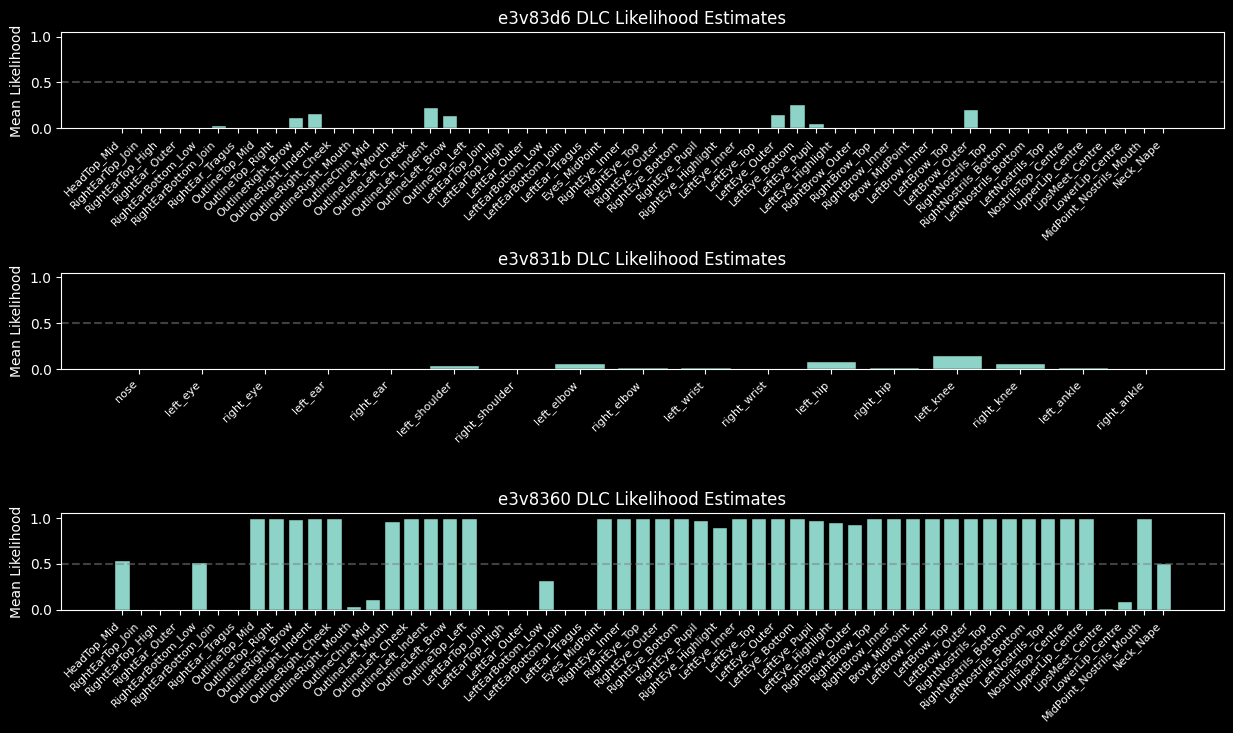

In [18]:
import warnings
import seaborn as sns
from dlc_primate.dlc_analysis import generate_marker_df, plot_bodypart_likelihoods

# turn off UserWarning: FixedFormatter should only be used together with FixedLocator
warnings.filterwarnings("ignore", category=UserWarning)
video_folder = '/Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_230929' 

dlc_df_dict = generate_marker_df(video_folder)
body_part_likelihoods = plot_bodypart_likelihoods(dlc_df_dict)

Skipping aragorn 230929 4 e3v83d6 LeftEye_Bottom - 0 poses
Skipping aragorn 230929 4 e3v83d6 OutlineLeft_Indent - 3 poses
Skipping aragorn 230929 4 e3v83d6 LeftBrow_Outer - 0 poses
Adding aragorn 230929 4 e3v83d6 OutlineRight_Indent - 11 poses
  Average (x,y): 223.87 84.82
Skipping aragorn 230929 4 e3v83d6 LeftEye_Outer - 0 poses
Skipping aragorn 230929 4 e3v83d6 OutlineLeft_Brow - 0 poses
Skipping aragorn 230929 4 e3v83d6 OutlineRight_Brow - 0 poses
Skipping aragorn 230929 4 e3v83d6 LeftEye_Pupil - 0 poses
Skipping aragorn 230929 4 e3v83d6 LeftNostrils_Top - 0 poses
Skipping aragorn 230929 4 e3v83d6 LeftEye_Inner - 0 poses
Adding aragorn 230929 4 e3v8360 LeftEye_Bottom - 179 poses
  Average (x,y): 342.37 202.05
Adding aragorn 230929 4 e3v8360 OutlineLeft_Indent - 179 poses
  Average (x,y): 351.99 255.87
Adding aragorn 230929 4 e3v8360 LeftBrow_Outer - 179 poses
  Average (x,y): 373.77 178.22
Adding aragorn 230929 4 e3v8360 OutlineRight_Indent - 179 poses
  Average (x,y): 244.99 265.95

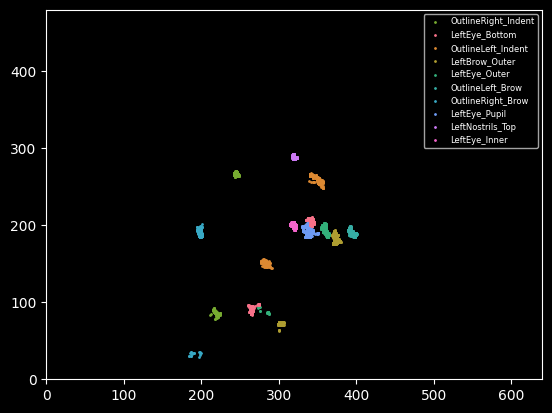

In [20]:
from collections import OrderedDict
import matplotlib.pyplot as plt

# plot all the x,y positions for top 10 body parts
selected_body_parts = list(body_part_likelihoods.keys())[:10]
# make colormap of length 'selected_body_parts'
colors = sns.color_palette('husl', len(selected_body_parts))
# make dictionary from colors
color_dict = {selected_body_parts[i]: colors[i] for i in range(len(selected_body_parts))}

f, ax = plt.subplots(1,1)

for monkey in dlc_df_dict.keys():
	for date in dlc_df_dict[monkey].keys():
		for trial in dlc_df_dict[monkey][date].keys():
			for camera in dlc_df_dict[monkey][date][trial].keys():
				scorer = dlc_df_dict[monkey][date][trial][camera].columns.get_level_values(0).unique()[0]
				body_parts = dlc_df_dict[monkey][date][trial][camera].columns.get_level_values(1).unique()
				for b_index, body_part in enumerate(selected_body_parts):
					if body_part in body_parts:
						df = dlc_df_dict[monkey][date][trial][camera][scorer][body_part]
						x = df['x'].tolist()
						y = df['y'].tolist()
						likelihood = df['likelihood'].tolist()
						# filter indice of all x, y positions where likelihood < 0.8
						indices = [i for i, l in enumerate(likelihood) if l < 0.8]
						# filter x,y positions where likelihood < 0.6
						x = [x[i] for i in range(len(x)) if i not in indices]
						if len(x) < 10:
							print(f'Skipping {monkey} {date} {trial} {camera} {body_part} - {len(x)} poses')
							continue
						x_mean = np.mean(x)
						y = [y[i] for i in range(len(y)) if i not in indices]
						y_mean = np.mean(y)
						print(f'Adding {monkey} {date} {trial} {camera} {body_part} - {len(x)} poses')
						print(f'  Average (x,y): {round(x_mean, 2)} {round(y_mean, 2)}')
						# plot x,y positions
						plt.scatter(x, y, color=color_dict[body_part], s=1, label=body_part)
						plt.xlim(0, 640)
						plt.ylim(0, 480)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=6)
plt.show()

In [15]:
epochs = [epoch for epoch in behavioral_code_dict.values()]
print('Epochs:')
[print(f'  {epochs}') for epochs in epochs]
pass

Epochs:
  Start Trial
  Fixation On
  Fixation Success
  CS On
  Fixation Off
  Trace Start
  Trace End
  Outcome Start
  Reward Trigger
  Airpuff Trigger
  Outcome
  Outcome End
  Manual Reward
  End Trial


### Canny Video Generation

In [17]:
from video.canny_detection import canny_detection

video_files = [file_name for file_name in os.listdir(video_folder) if file_name.endswith('.mp4') and 'filtered' not in file_name]
for video in video_files:
	# get trial number
	trial_index = int(video.split('_')[-2])
	print(f'Trial Index: {trial_index}')
	trial = session_df[session_df['trial_num'] == trial_index+1]
	video_path = os.path.join(video_folder, video)
	canny_detection(trial, epochs, video_path, slowdown=4)

Trial Index: 13
  Eye Positions: 7425
  Video: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_13_e3v831b.mp4
    Original FPS: 120.0
       Slowing Video by: 4x
    Final FPS: 30
    Width x Height: 640x480
    Num Frames (cam_frames): 891
    Num Frames (video): 700.0
    Frames: 4-7421
Trial Index: 183
  Eye Positions: 9348
  Video: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_183_e3v83ad.mp4
    Original FPS: 120.0
       Slowing Video by: 4x
    Final FPS: 30
    Width x Height: 640x480
    Num Frames (cam_frames): 1121
    Num Frames (video): 934.0
    Frames: 8-9341
Trial Index: 183
  Eye Positions: 9348
  Video: /Users/rahimhashim/Downloads/aragorn_240411/aragorn_240411_183_e3v8360.mp4
    Original FPS: 120.0
       Slowing Video by: 4x
    Final FPS: 30
    Width x Height: 640x480
    Num Frames (cam_frames): 1121
    Num Frames (video): 934.0
    Frames: 8-9341
Trial Index: 222
  Eye Positions: 20551
  Video: /Users/rahimhashim/Downloads/aragorn_24041

### Eye And Lick Videos

In [10]:
from video.ml_videos import generate_ml_behavior_videos
trial_num_selected = 30
generate_ml_behavior_videos(session_df, 
														session_obj, 
														trial_num_selected, 
														epoch_start='Start Trial', 
														epoch_end='end',
														subsample=10,
														slowdown=4)

Generating video for trial 30
  Number of Frames: 1342
  Parsing Analog Data: Epochs 1570 to 11187
  Subsampling Analog Data: (1000/10) fps


Trial 30 frame:   0%|          | 0/962 [00:00<?, ?it/s]

  Saving Frames to /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/trial_29
Deleting existing video: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/eye_0029.mp4
Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/eye_0029.mp4
   Slowing Video by: 4x
  FPS: 25.0


Trial 29 eye:   0%|          | 0/962 [00:00<?, ?it/s]

Deleting existing video: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/lick_0029.mp4
Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/lick_0029.mp4
   Slowing Video by: 4x
  FPS: 25.0


Trial 29 lick:   0%|          | 0/962 [00:00<?, ?it/s]

Deleting image folder: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_240411/trial_29


***
## DeepLabCut

In [102]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut
# Custom modules
from dlc_primate.dlc_utils import dlc_config, dlc_downsample

camera_dict = {
	'e3v8360':'face_1', 
	'e3v83d6':'face_2',
	'e3v83ad':'body_1',
	'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

ModuleNotFoundError: No module named 'deeplabcut'

In [ ]:
def initialize_project(dlc_video_path_dict, session_obj, camera_dict):

	config_path_dict = {}
	train_config_path_dict = {}

	# Create ModelZoo project
	for key in dlc_video_path_dict.keys():
		body_part = camera_dict[key]
		project_name = f'{session_obj.date}_{session_obj.monkey}_{body_part}'
		your_name = 'rahim'
		if 'face' in body_part:
			model2use = 'primate_face'
		else:
			model2use = 'full_macaque'
		
		# get list of videos
		video_path_list = dlc_video_path_dict[key]
		# .mp4 or .avi etc.
		videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

		# Check if videos need to be downsampled
		downsample_flag = dlc_downsample.check_for_downsample(video_path_list)

		if downsample_flag:
				video_path_list = dlc_downsample.downsample_videos(video_path_list)

		config_path, train_config_path = deeplabcut.create_pretrained_project(
				project_name,
				your_name,
				video_path_list[0:1],
				videotype=videotype,
				model=model2use,
				analyzevideo=True,
				createlabeledvideo=True,
				copy_videos=False, # must leave copy_videos=True
		)
		config_path_dict[key] = config_path
		train_config_path_dict[key] = train_config_path

		# Clean pretrained project
		dlc_config.clean_pretrained_project(config_path)

	return config_path_dict, train_config_path_dict

config_path_dict, train_config_path_dict = initialize_project(dlc_video_path_dict, session_obj, camera_dict)

In [ ]:
for key in dlc_video_path_dict.keys():
	video_path_list = dlc_video_path_dict[key]
	video_list_subset = video_path_list[:]
	config_path = config_path_dict[key]
	# Adding new videos to the config.yaml file
	deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
					coords=None, extract_frames=False
	)

	# Analyze specified videos
	deeplabcut.analyze_videos(config_path, video_list_subset, 
					videotype, save_as_csv=True
	)

	# Filter predictions
	deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

	# Create labeled videos
	deeplabcut.create_labeled_video(
		config_path, video_list_subset, 
		videotype, 
		draw_skeleton=True, 
		filtered=True,
		trailpoints=5,
	)

	# Plot trajectories
	deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

In [ ]:
import deeplabcut
from dlc_primate.dlc_utils import dlc_config

camera_dict = {
	'e3v8360':'face_1', 
	'e3v83d6':'face_2',
	'e3v83ad':'body_1',
	'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

# Initialize project
config_path_dict, train_config_path_dict = \
	dlc_config.dlc_initialize_project(dlc_video_path_dict, session_obj, camera_dict)

# Run DLC
dlc_config.dlc_run(config_path_dict, dlc_video_path_dict, videotype='mp4')

***
## Save Dataframe

In [148]:
import pickle
from config.h5_helper import pickler

# dest_path = os.path.join('..', 'data', '_'.join([session_obj.monkey, session_obj.date]))
data_path = os.path.join(os.getcwd(), '_data', '_'.join([session_obj.monkey,session_obj.date]))

pickler(True, 
	save_path=data_path, 
	session_df=session_obj.df, 
	monkey_input='aragorn',
	experiment_name='airpuff',
	error_dict=error_dict, 
	behavioral_code_dict=behavioral_code_dict)

Saving .pickle files to: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/aragorn_240411
  Pickling 240411_aragorn_airpuff_behave.pkl
  Total time to pickle: 0.9019 sec
